# **EDA - 1**

## About - Dataset:
**Source:**

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


**Description:**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

# **Title: Bike Details Dataset**
-  **=name:** Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
- **selling_price:** Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
- **year:** Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
- **seller_type:** Seller category, either "Individual" or "Dealer" (Categorical)Z
- **owner:** Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
- **km_driven:** Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
- **ex_showroom_price:** Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

# **Questions:**


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')
# Display the first few rows of the dataframe
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


**Q1.What is the range of selling prices in the dataset?**

In [ ]:
#Answer 1 
# Find the range of selling prices

min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
print(f"Range of selling prices: ₹{min_price} to ₹{max_price}")


Range of selling prices: ₹5000 to ₹760000


**Q2.What is the median selling price for bikes in the dataset?**

In [ ]:
#Answer 2
# Find median selling price
median_price = df["selling_price"].median()
print(f"Median selling price: ₹{median_price}")


Median selling price: ₹45000.0


**Q3. What is the most common seller type?**

In [ ]:
#Answer 3
# Count occurrences of each seller type
seller_counts = df["seller_type"].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**Q4.How many bikes have driven more than 50,000 kilometers?**

In [14]:
#Answer 4
# Count bikes with km_driven > 50,000
high_mileage_bikes = df[df["km_driven"] > 50000]
print(f"Number of bikes driven more than 50,000 km: {len(high_mileage_bikes)}")

Number of bikes driven more than 50,000 km: 170


**Q5. What is the average km_driven value for each ownership type?**

In [15]:
#Answer 5
# Calculate average km_driven for each ownership type
avg_km_driven = df.groupby("owner")["km_driven"].mean()
print(avg_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**Q6.What proportion of bikes are from the year 2015 or older?**

In [16]:
#Answer 6
# Count bikes from 2015 or older
older_bikes = df[df["year"] <= 2015]
proportion = len(older_bikes) / len(df) * 100

print(f"Proportion of bikes from 2015 or older: {proportion:.2f}%")


Proportion of bikes from 2015 or older: 56.64%


**Q7.What is the trend of missing values across the dataset?**

Missing Values Count:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


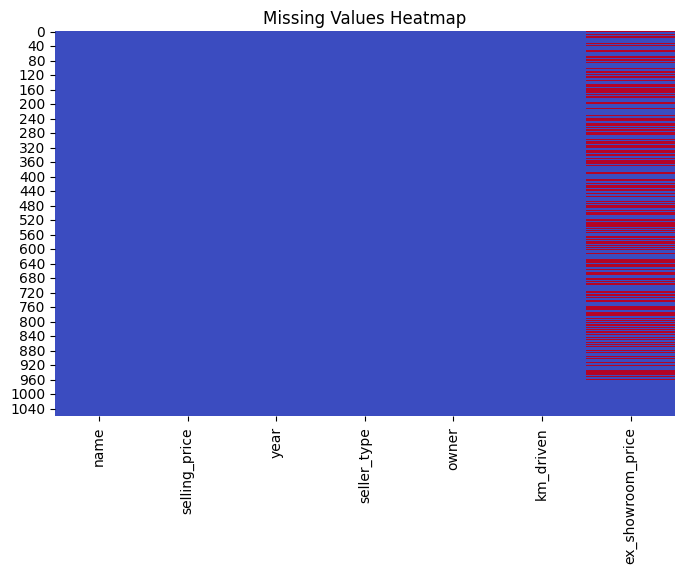

In [18]:
# Answer 7
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values Count:\n", missing_values)

# Visualizing missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


**Q8.What is the highest ex_showroom_price recorded, and for which bike?**

In [19]:
#answer 8

# Find the highest ex-showroom price and corresponding bike
max_price = df["ex_showroom_price"].max()
bike_name = df[df["ex_showroom_price"] == max_price]["name"].values[0]

print(f"Highest ex-showroom price: ₹{max_price}, Bike: {bike_name}")


Highest ex-showroom price: ₹1278000.0, Bike: Harley-Davidson Street Bob


**Q9.What is the total number of bikes listed by each seller type?**

Total number of bikes listed by each seller type:

- Individual: 1055 bikes
- Dealer: 6 bikes


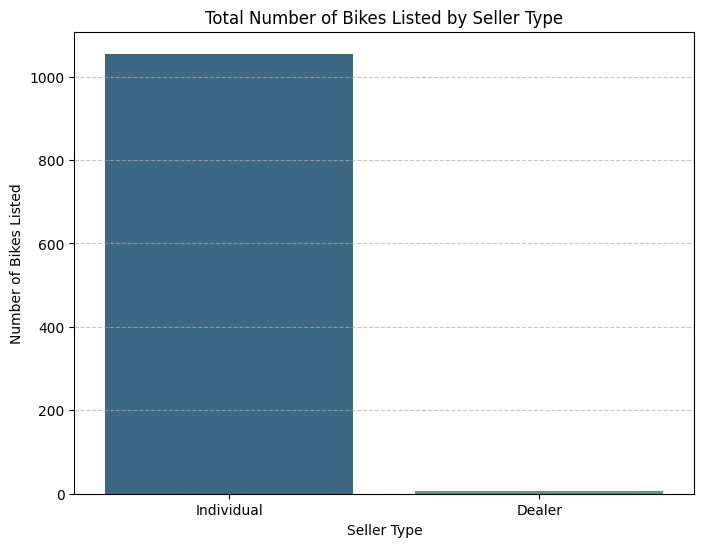

In [24]:
#Answer 9
# Calculate the total number of bikes listed by each seller type
bikes_by_seller = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:\n")
for seller_type, count in bikes_by_seller.items():
    print(f"- {seller_type}: {count} bikes")

# Visualize the total number of bikes listed by each seller type
plt.figure(figsize=(8, 6))
sns.barplot(x=bikes_by_seller.index, y=bikes_by_seller.values, palette='viridis')
plt.title('Total Number of Bikes Listed by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes Listed')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Q10. What is the relationship between selling_price and km_driven for first-owner bikes?**

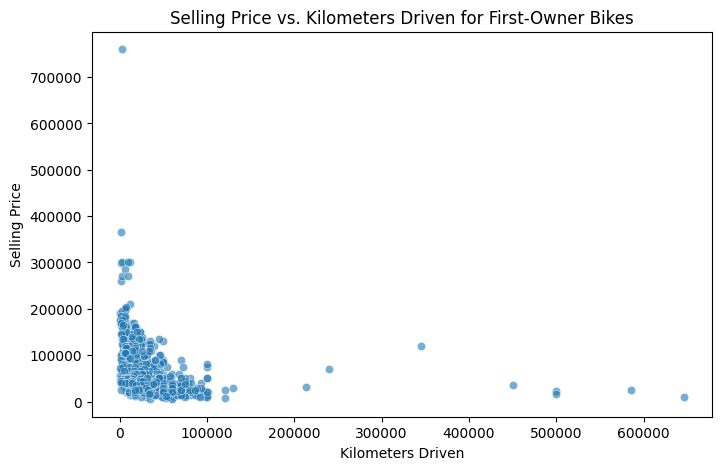

Correlation between selling price and km driven: -0.24


In [26]:
# Answer 10
# Filter first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]

# Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"], alpha=0.6)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Kilometers Driven for First-Owner Bikes")
plt.show()

# Calculate correlation coefficient
correlation = first_owner_bikes["km_driven"].corr(first_owner_bikes["selling_price"])
print(f"Correlation between selling price and km driven: {correlation:.2f}")


**Q11. Identify and remove outliers in the km_driven column using the IQR method.**

In [27]:
#Answer 11
# Calculate Q1, Q3, and IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

print(f"Original dataset size: {len(df)}, Cleaned dataset size: {len(df_cleaned)}")


IQR: 29500.0, Lower Bound: -30750.0, Upper Bound: 87250.0
Original dataset size: 1061, Cleaned dataset size: 1022


**Q12.Perform a bivariate analysis to visualize the relationship between year and selling_price?**

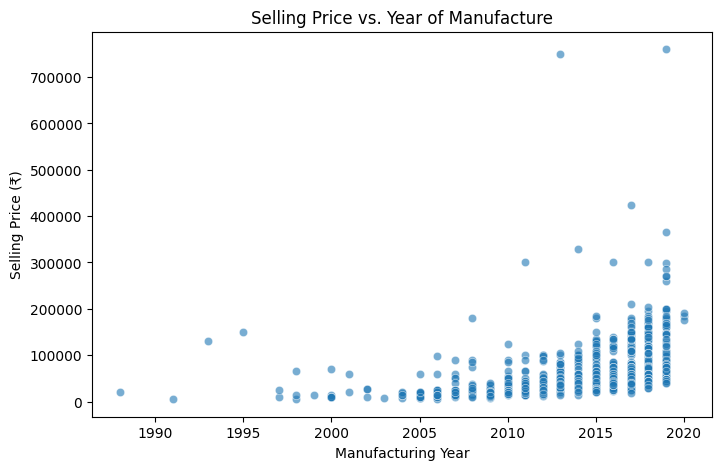

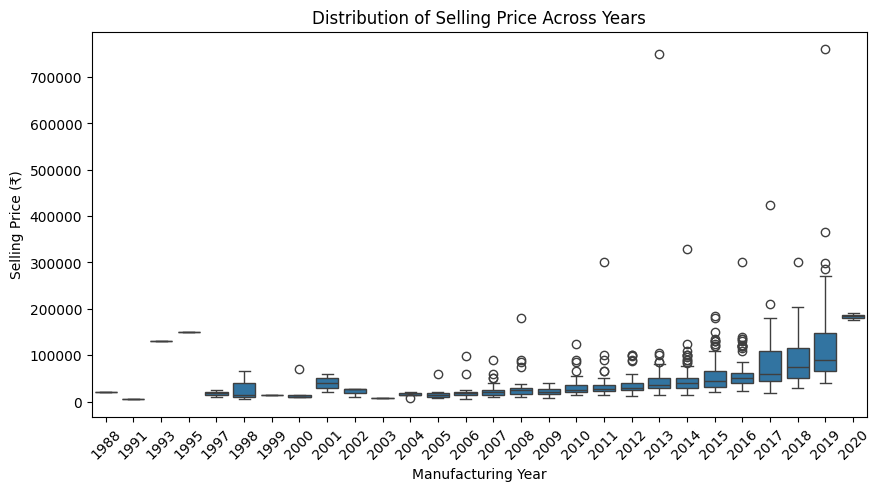

In [28]:
# Answer 12
# Scatter plot to visualize the trend
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year"], y=df["selling_price"], alpha=0.6)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (₹)")
plt.title("Selling Price vs. Year of Manufacture")
plt.show()

# Box plot to observe price distribution per year
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.xticks(rotation=45)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (₹)")
plt.title("Distribution of Selling Price Across Years")
plt.show()

**Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?**

In [29]:
# Answer 13
# Calculate bike age (assuming current year is 2025)
df["bike_age"] = 2025 - df["year"]

# Avoid division by zero (for brand-new bikes)
df = df[df["bike_age"] > 0]

# Calculate depreciation per year
df["depreciation_per_year"] = df["selling_price"] / df["bike_age"]

# Find the average depreciation
average_depreciation = df["depreciation_per_year"].mean()

print(f"Average depreciation in selling price per year: ₹{average_depreciation:.2f}")


Average depreciation in selling price per year: ₹7001.30


**Q14. Which bike names are priced significantly above the average price for their manufacturing year?**

In [30]:
# Answer 14
# Calculate average selling price per year
avg_price_per_year = df.groupby("year")["selling_price"].mean()

# Merge this average price back into the dataset
df["avg_price_for_year"] = df["year"].map(avg_price_per_year)

# Identify bikes priced significantly above the average (e.g., 1.5 times higher)
df_high_price = df[df["selling_price"] > 1.5 * df["avg_price_for_year"]]

# Display results
print(df_high_price[["name", "year", "selling_price", "avg_price_for_year"]])


                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_price_for_year  
2          87660.374046  
7          34289.285714  
13        119689.511628  
18         87660.374046  
23        119689.511628  
..                  ...  
979        56500.000000  

**Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

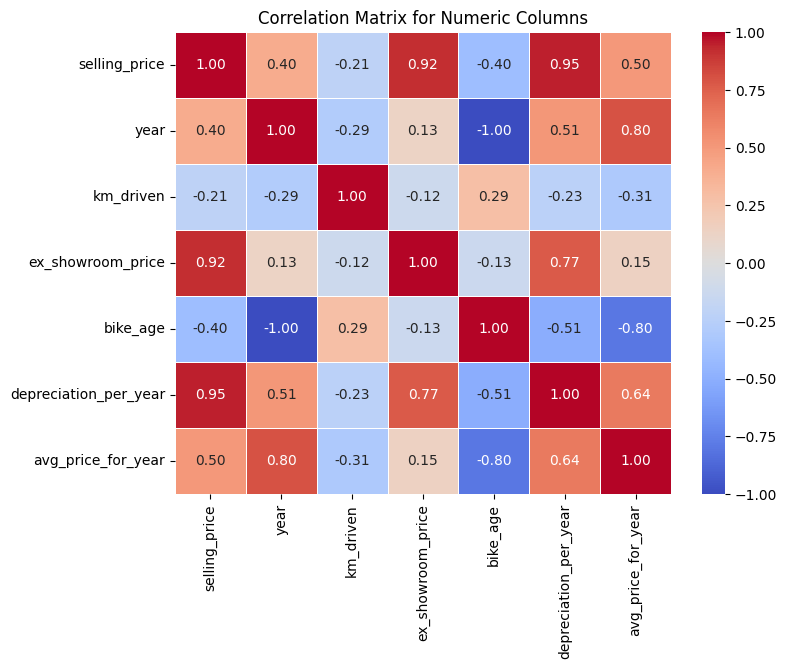

In [31]:
# Answer 15
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Columns")
plt.show()



# **EDA 2:**

**Souece:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences
Title : Car sale Datset
Features:

- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries

- Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD

- Customer Name: The name of the customer who purchased the car, represented as a string

- Gender: The gender of the customer, categorized as "Male" or "Female.

- Annual Income: The customer's annual income in US dollars, represented as a numeric value

- Dealer_Name: The name of the dealership selling the car, represented as a string

- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc

- Model: The specific model name of the car, such as "Corolla," "C

- Engine: The engine type of the car, such as "V6," "I4," etc

- Transmission: The type of transmission in the car, either "Manual" or "Automatic.

- Color: The color of the car, represented as a string (e.g., "Red," "Blue") bold text Price ($): The selling price of the car in US dollars Body

- Dealer_No: A unique identifier for each car dealer in the dataset

- body Style: The body style of the car, such as "Sedan," "SUV," etc

- Phone: The phone number of the customer who purchased the car

- Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.


In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv('Car Sale.csv')
# Display the first few rows of the dataframe
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


# **Questions:**

**Q1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

Average selling price of cars for each dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                          

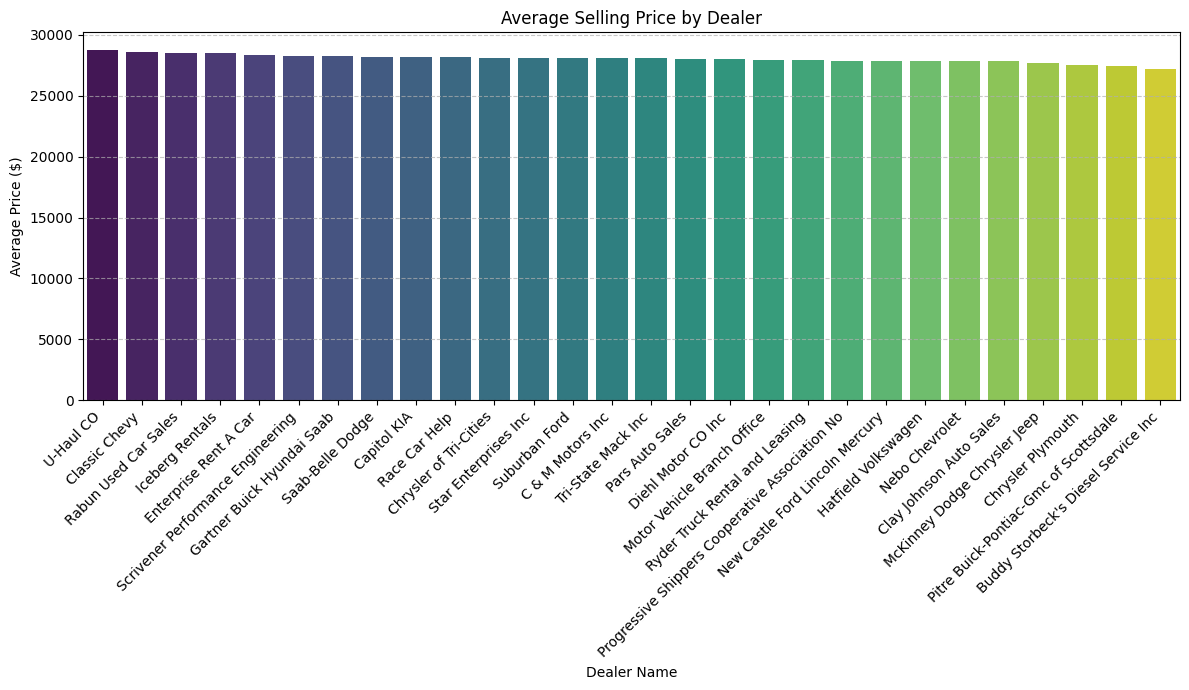

In [34]:
# Answer 1
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price of cars for each dealer:\n", avg_price_by_dealer)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values, palette='viridis')
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Q2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?**

Standard deviation of prices for each car company (variation):
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

Lincoln has the highest variation in prices.
This suggests that this brand likely off

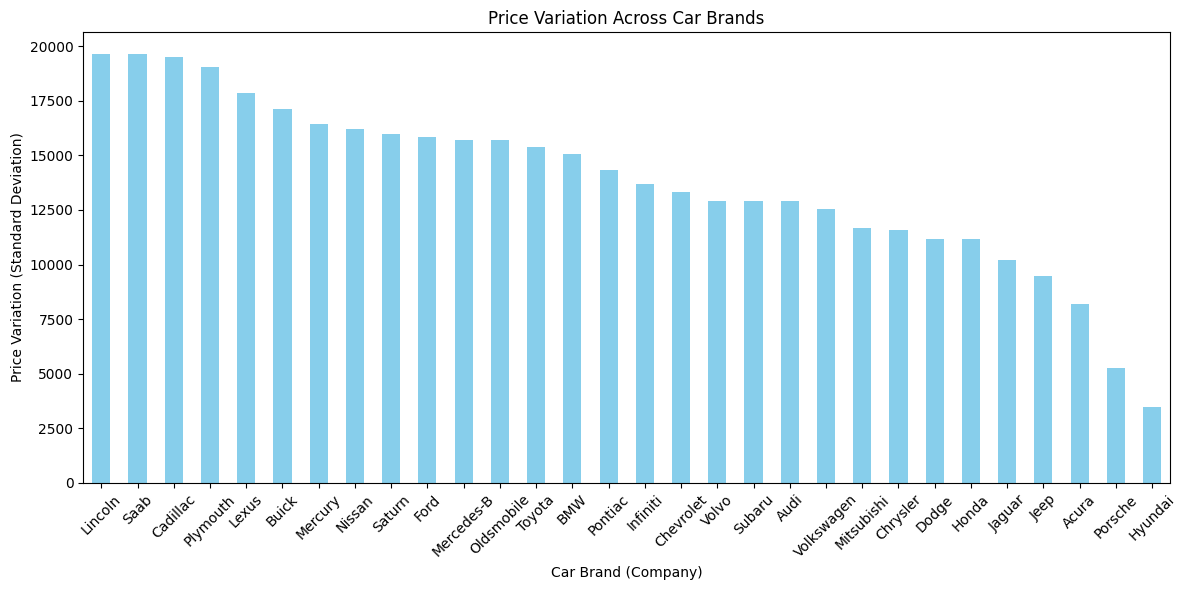

In [ ]:
# Answer 2
price_variation_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Standard deviation of prices for each car company (variation):\n", price_variation_by_company)

highest_variation_company = price_variation_by_company.index[0]
print(f"\n{highest_variation_company} has the highest variation in prices.")
print("This suggests that this brand likely offers a wide range of models, from entry-level to luxury, or has significant price differences between new and used models, or models with different features/conditions.")

# The standard deviation of prices for each car company is already calculated in price_variation_by_company
print("Standard deviation of prices for each car company (variation):\n", price_variation_by_company)

# The company with the highest variation
print(f"\n{highest_variation_company} has the highest variation in prices.")
print("This suggests that this brand likely offers a wide range of models, from entry-level to luxury, or has significant price differences between new and used models, or models with different features/conditions.")

# Visualize the price variation across companies
plt.figure(figsize=(12, 6))
price_variation_by_company.plot(kind="bar", color="skyblue")
plt.xlabel("Car Brand (Company)")
plt.ylabel("Price Variation (Standard Deviation)")
plt.title("Price Variation Across Car Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?**

Dataset columns: Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Interquartile Ranges (IQR) for each transmission type:
                 0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


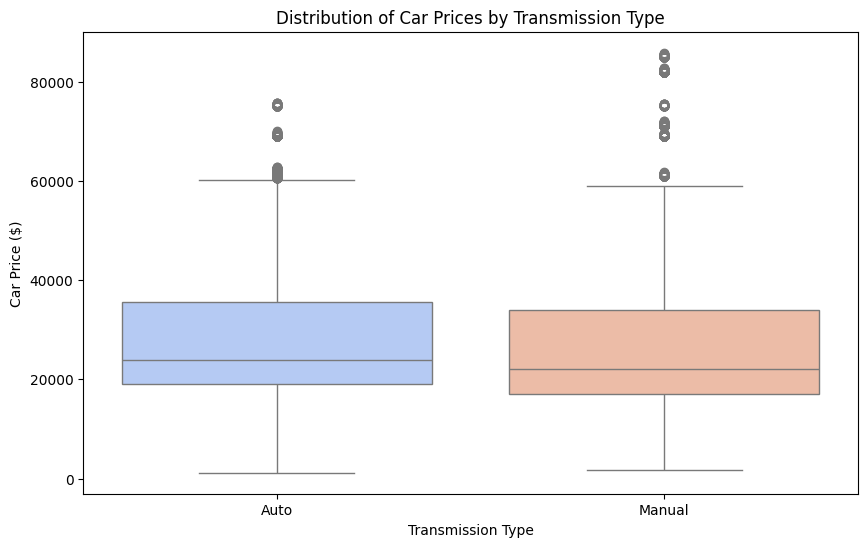

In [ ]:
# Answer 3
# Display available columns
print("Dataset columns:", df.columns)

# Rename 'Price ($)' to 'Price' if necessary
df.rename(columns={"Price ($)": "Price"}, inplace=True)

# Drop missing values in 'Price' and 'Transmission'
df = df.dropna(subset=["Price", "Transmission"])

# Convert 'Price' to numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df = df.dropna(subset=["Price"])

# Calculate Interquartile Range (IQR) for each Transmission Type
iqr_values = df.groupby("Transmission")["Price"].quantile([0.25, 0.75]).unstack()
iqr_values["IQR"] = iqr_values[0.75] - iqr_values[0.25]

print("\nInterquartile Ranges (IQR) for each transmission type:")
print(iqr_values)

# Create a box plot to visualize price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Transmission"], y=df["Price"], palette="coolwarm")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

**Q4.What is the distribution of car prices across different regions?**

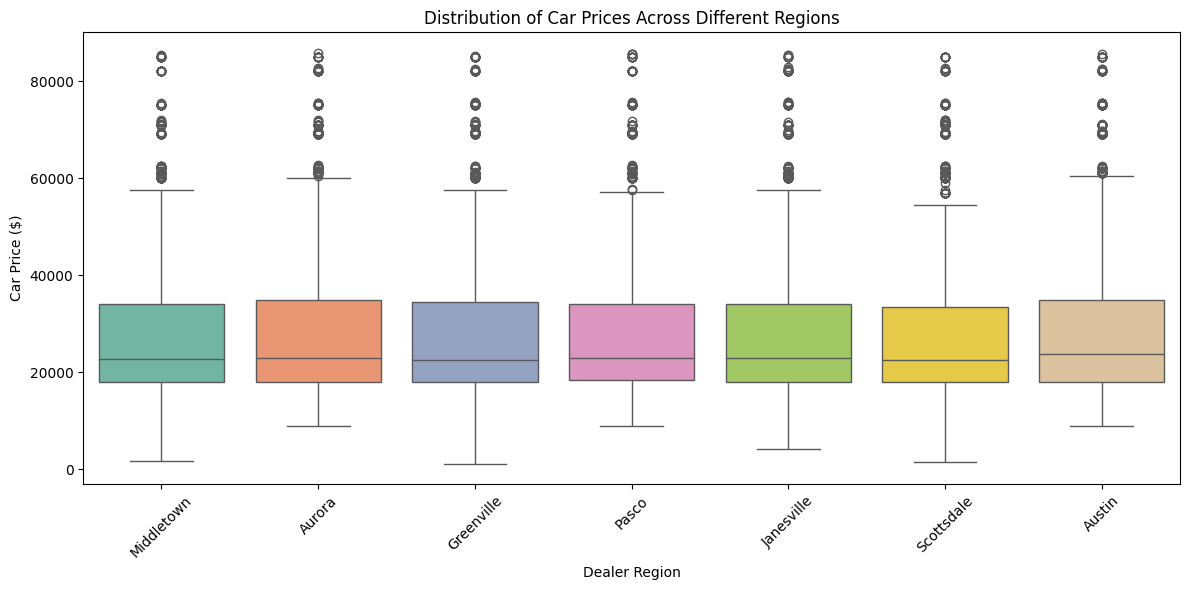

In [ ]:
# Answer 4
# Distribution of car prices across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df, palette='Set2')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q5. What is the distribution of cars based on body styles?**

Distribution of cars by body style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


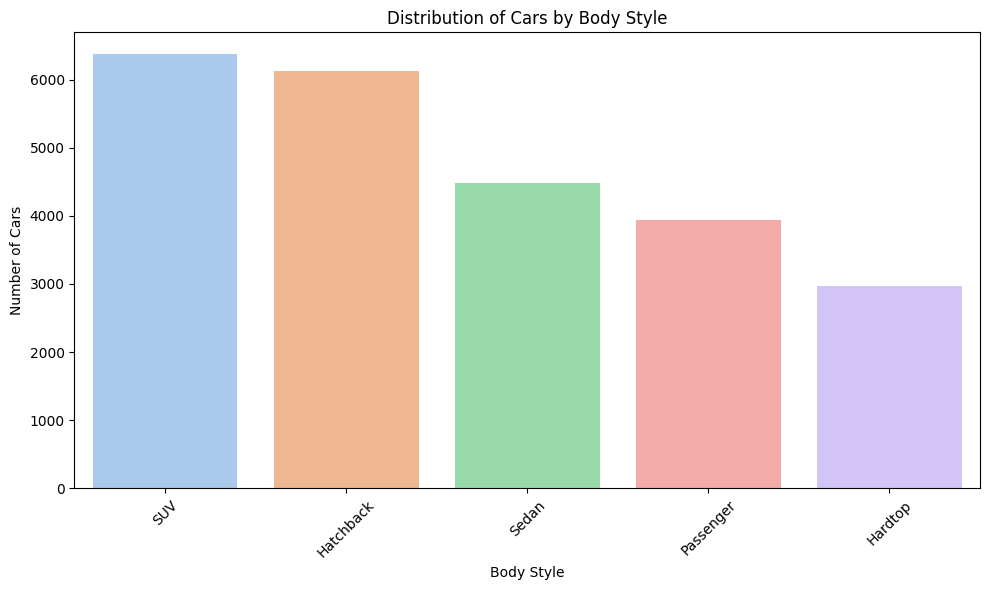

In [ ]:
# Answer 5
# Distribution of cars based on body styles
body_style_counts = df['Body Style'].value_counts()
print("Distribution of cars by body style:\n", body_style_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='pastel')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q6. How does the average selling price of cars vary by customer gender and annual income?**

Average selling price and annual income by customer gender:
            avg_price     avg_income  count
Gender                                    
Female  28277.265270  755973.021339   5108
Male    28039.429407  851184.044207  18798


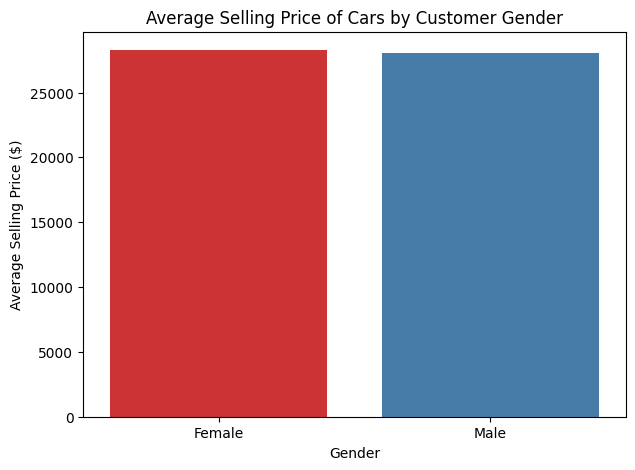

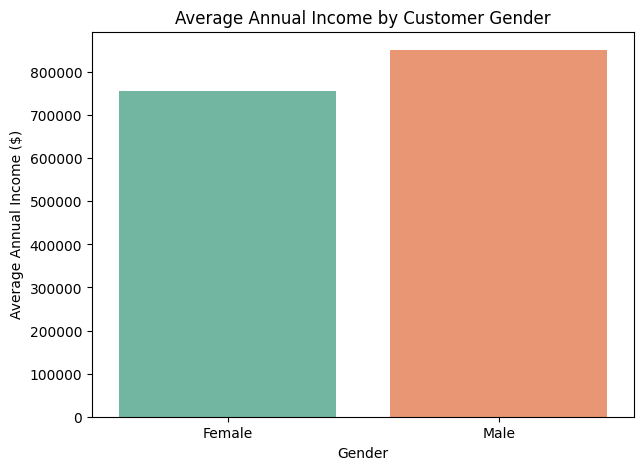

In [ ]:
# Answer 6
# Group by Gender and calculate average selling price and average annual income
avg_price_income_by_gender = df.groupby('Gender').agg(
    avg_price=('Price', 'mean'),
    avg_income=('Annual Income', 'mean'),
    count=('Price', 'count')
)

print("Average selling price and annual income by customer gender:\n", avg_price_income_by_gender)

# Visualize average selling price by gender
plt.figure(figsize=(7, 5))
sns.barplot(x=avg_price_income_by_gender.index, y=avg_price_income_by_gender['avg_price'], palette='Set1')
plt.title('Average Selling Price of Cars by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price ($)')
plt.show()

# Visualize average annual income by gender
plt.figure(figsize=(7, 5))
sns.barplot(x=avg_price_income_by_gender.index, y=avg_price_income_by_gender['avg_income'], palette='Set2')
plt.title('Average Annual Income by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Average Annual Income ($)')
plt.show()

**Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

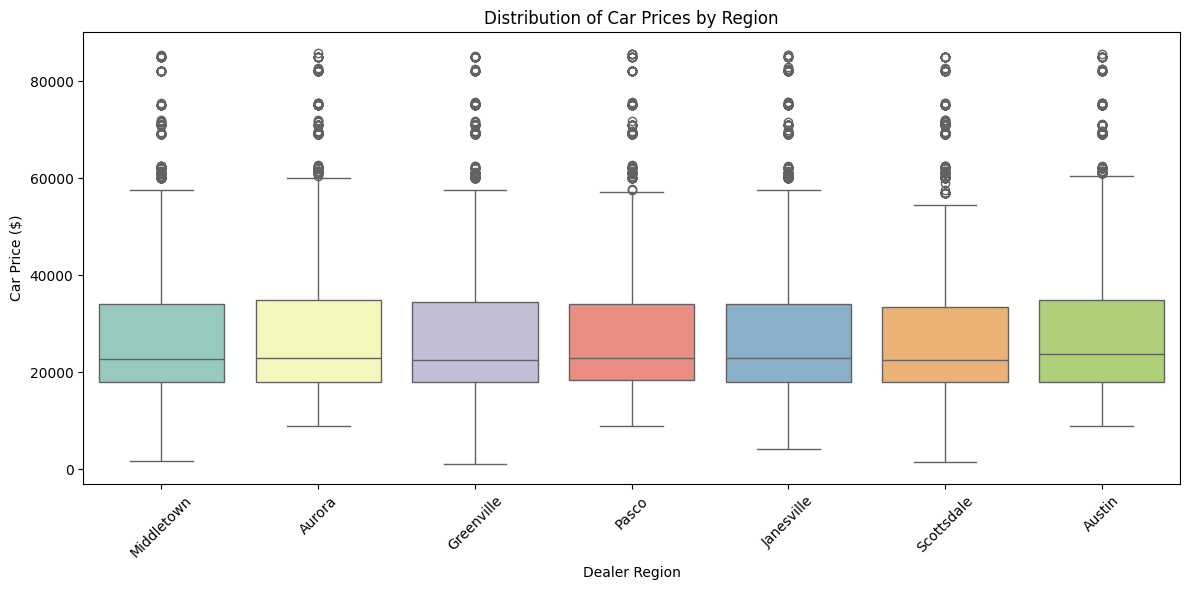

Number of cars sold by region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


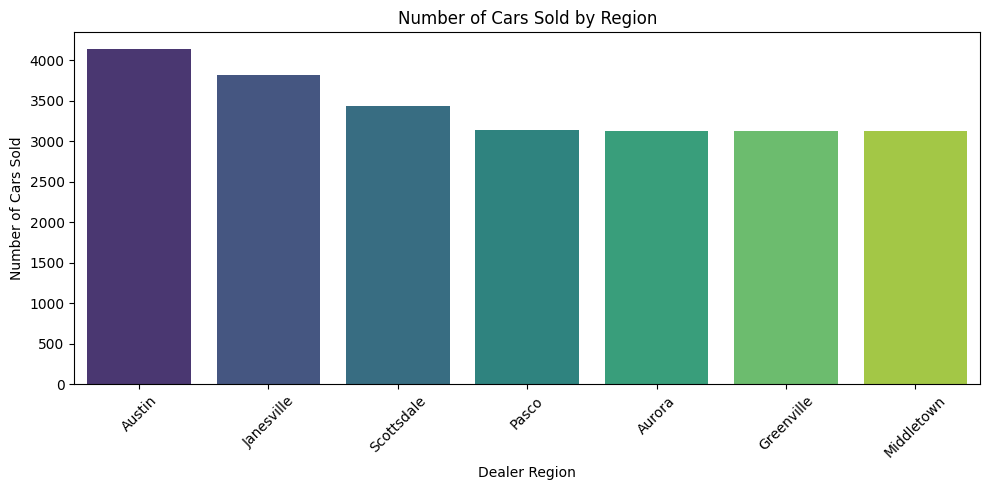

In [45]:
# Answer 7

# Distribution of car prices by region using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df, palette='Set3')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of cars sold by region
region_counts = df['Dealer_Region'].value_counts()
print("Number of cars sold by region:\n", region_counts)

# Visualize the number of cars sold by region
plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q8. How does the average car price differ between cars with different engine sizes?**

Average car price by engine type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price, dtype: float64


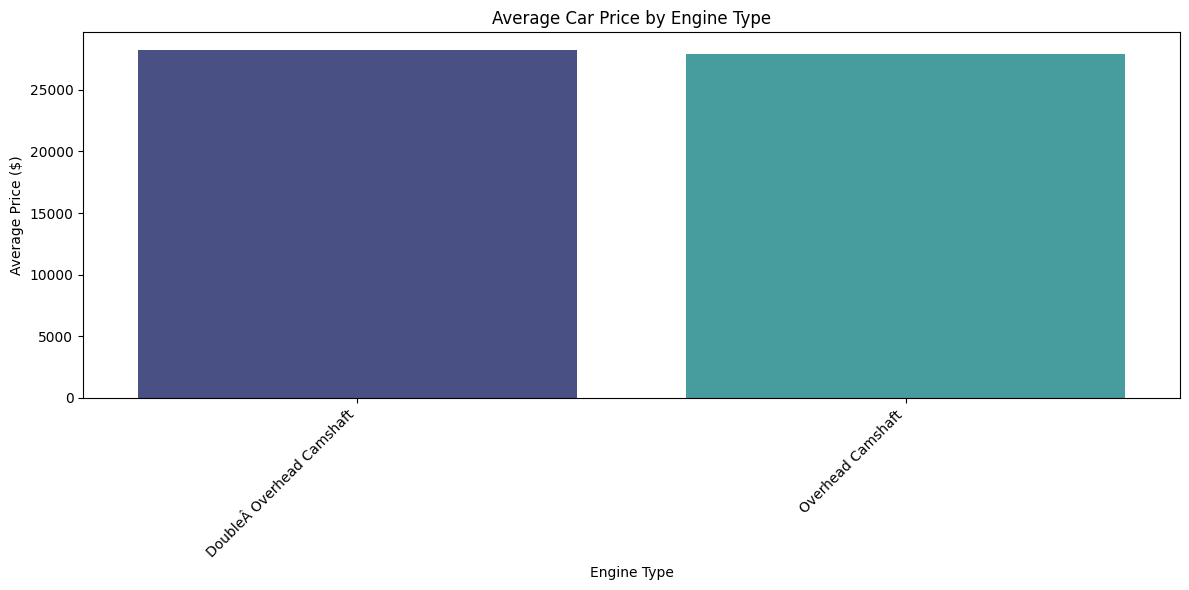

In [46]:
# Answer 8
# Group by Engine type and calculate average car price
avg_price_by_engine = df.groupby('Engine')['Price'].mean().sort_values(ascending=False)
print("Average car price by engine type:\n", avg_price_by_engine)

# Visualize the average price by engine type
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette='mako')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Q9. How do car prices vary based on the customer’s annual income bracket?**

Average car price by annual income bracket:
 Income Bracket
<250k        27896.106371
250k-500k    28555.392229
500k-750k    27763.183618
750k-1M      28304.222958
1M+          28016.841147
Name: Price, dtype: float64


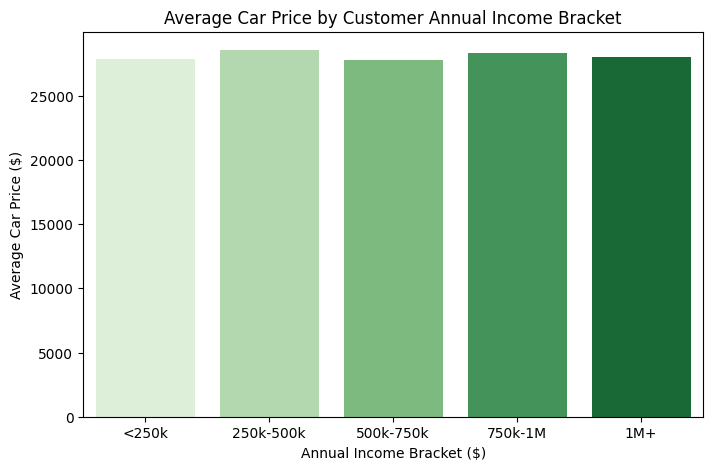

In [51]:
# Answer 9

# Define income brackets
bins = [0, 250000, 500000, 750000, 1000000, 2000000]
labels = ['<250k', '250k-500k', '500k-750k', '750k-1M', '1M+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)

# Calculate average car price for each income bracket
avg_price_by_income_bracket = df.groupby('Income Bracket')['Price'].mean()
print("Average car price by annual income bracket:\n", avg_price_by_income_bracket)

# Visualize the variation
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_income_bracket.index, y=avg_price_by_income_bracket.values, palette='Greens')
plt.title('Average Car Price by Customer Annual Income Bracket')
plt.xlabel('Annual Income Bracket ($)')
plt.ylabel('Average Car Price ($)')
plt.show()

**Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

Top 5 car models with the highest number of sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


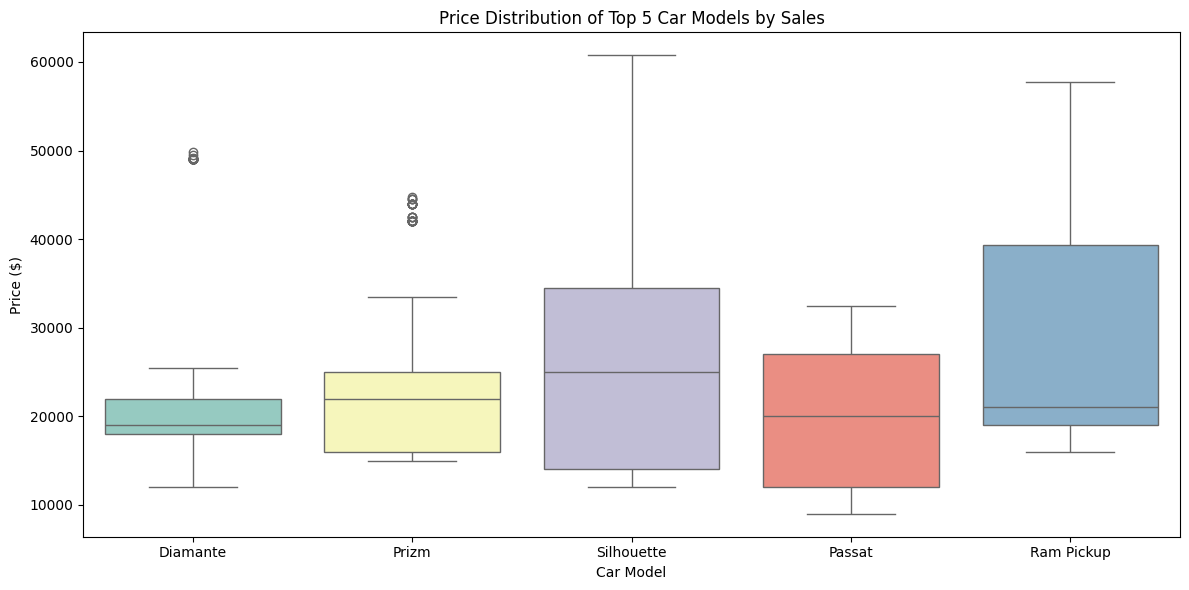

In [52]:
# Answer 10
# Find the top 5 car models with the highest number of sales
top_models = df['Model'].value_counts().head(5)
print("Top 5 car models with the highest number of sales:\n", top_models)

# Visualize the price distribution for these top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price', data=df[df['Model'].isin(top_models.index)], order=top_models.index, palette='Set3')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

**Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

Top 5 colors with highest price variation:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price, dtype: float64


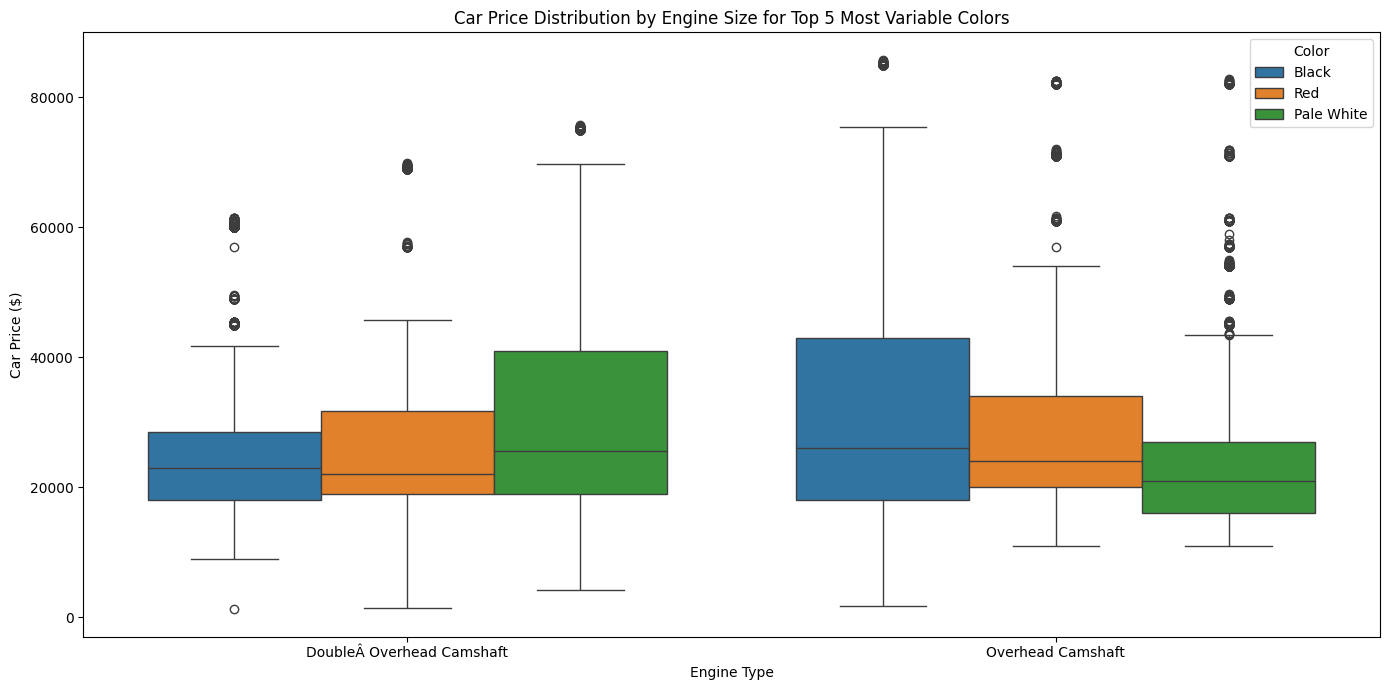

In [53]:
# Answer 11

# Group by Engine and Color, calculate average and standard deviation of car price
engine_color_stats = df.groupby(['Engine', 'Color'])['Price'].agg(['mean', 'std', 'count']).reset_index()

# Find colors with the highest price variation (std) across all engines
color_price_variation = df.groupby('Color')['Price'].std().sort_values(ascending=False)
top_variation_colors = color_price_variation.head(5)
print("Top 5 colors with highest price variation:\n", top_variation_colors)

# Visualize: Boxplot of car price by engine size for top 5 most variable colors
top_colors = top_variation_colors.index.tolist()
plt.figure(figsize=(14, 7))
sns.boxplot(x='Engine', y='Price', hue='Color', data=df[df['Color'].isin(top_colors)])
plt.title('Car Price Distribution by Engine Size for Top 5 Most Variable Colors')
plt.xlabel('Engine Type')
plt.ylabel('Car Price ($)')
plt.legend(title='Color')
plt.tight_layout()
plt.show()

**Q12. Is there any seasonal trend in car sales based on the date of sale?**

Number of car sales per month:
 Sale_Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


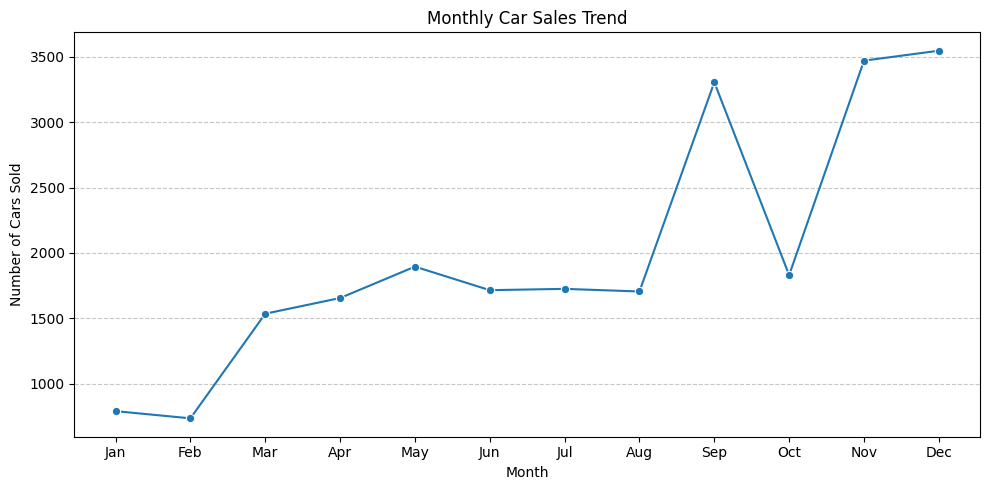

In [54]:
# Answer 12

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month from the date
df['Sale_Month'] = df['Date'].dt.month

# Count number of sales per month
monthly_sales = df['Sale_Month'].value_counts().sort_index()

print("Number of car sales per month:\n", monthly_sales)

# Visualize the seasonal trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Q13. How does the car price distribution change when considering different combinations of body style and transmission type?**

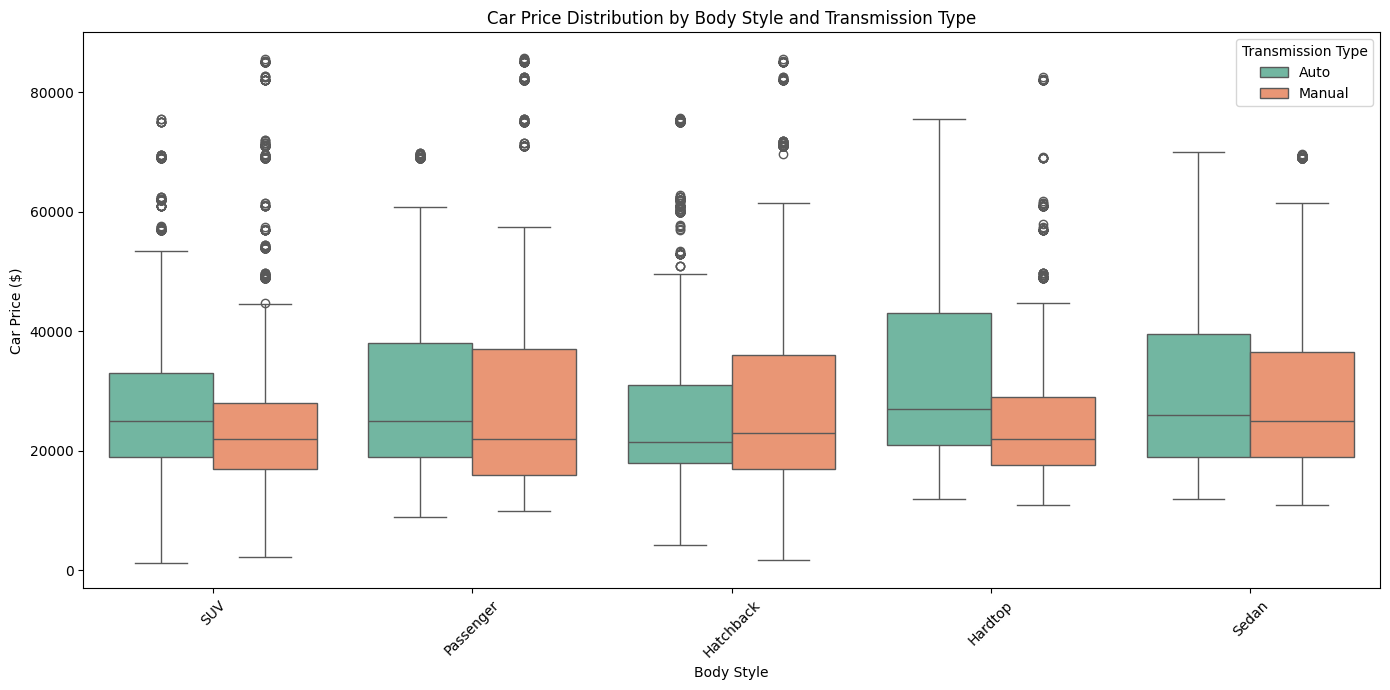

In [56]:
# Answer 13
# Visualize car price distribution for each combination of body style and transmission type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Body Style', y='Price', hue='Transmission', data=df, palette='Set2')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Car Price ($)')
plt.legend(title='Transmission Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

Correlation matrix:
                   Price  Annual Income  Engine_Code
Price          1.000000       0.012065    -0.011271
Annual Income  0.012065       1.000000    -0.006598
Engine_Code   -0.011271      -0.006598     1.000000


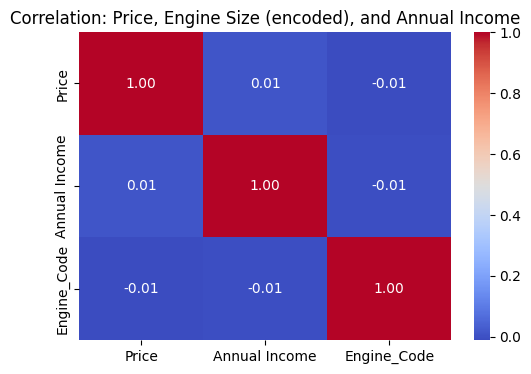

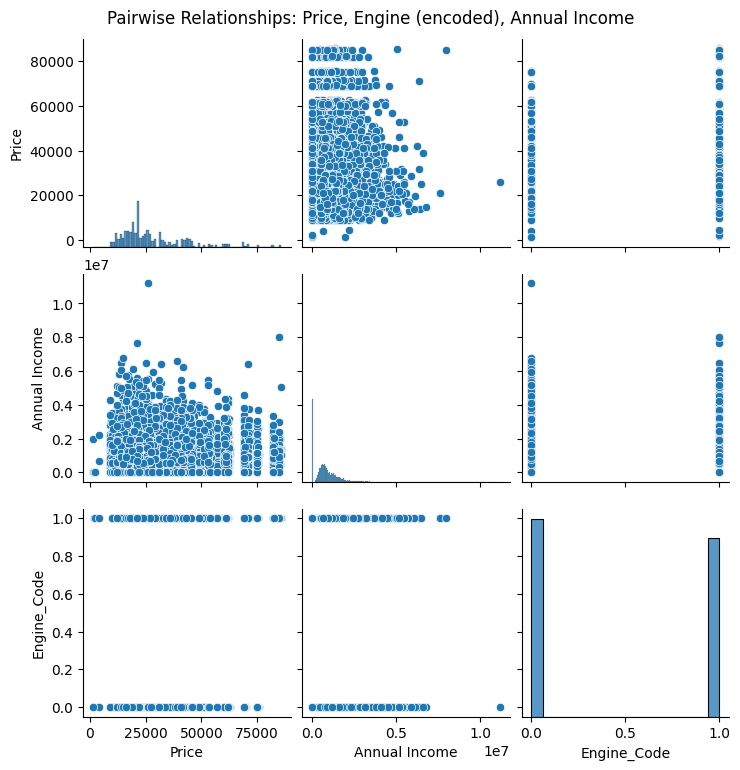

In [ ]:
# Answer 14
# We'll use 'Price', 'Annual Income', and encode 'Engine' as categorical codes

# Create a copy to avoid modifying the original df
df_corr = df[['Price', 'Annual Income', 'Engine']].copy()

# Encode 'Engine' as categorical codes
df_corr['Engine_Code'] = df_corr['Engine'].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_corr[['Price', 'Annual Income', 'Engine_Code']].corr()
print("Correlation matrix:\n", corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Price, Engine Size (encoded), and Annual Income')
plt.show()

# Pairplot to visualize interactions
sns.pairplot(df_corr, vars=['Price', 'Annual Income', 'Engine_Code'])
plt.suptitle('Pairwise Relationships: Price, Engine (encoded), Annual Income', y=1.02)
plt.show()

**Q15. How does the average car price vary across different car models and engine types?**

Top 10 Model-Engine combinations by average price:
            Model                     Engine         Price
212           SC          Overhead Camshaft  61074.818182
198       Ranger  DoubleÂ Overhead Camshaft  61064.055556
222        Sable          Overhead Camshaft  61039.770833
56        Catera  DoubleÂ Overhead Camshaft  56836.933333
143        LX470          Overhead Camshaft  54037.490196
139        LS400          Overhead Camshaft  53157.941558
111        GS400          Overhead Camshaft  53086.000000
239       Tacoma  DoubleÂ Overhead Camshaft  53085.821918
25        Aurora          Overhead Camshaft  51833.556962
173  Park Avenue  DoubleÂ Overhead Camshaft  49387.750000


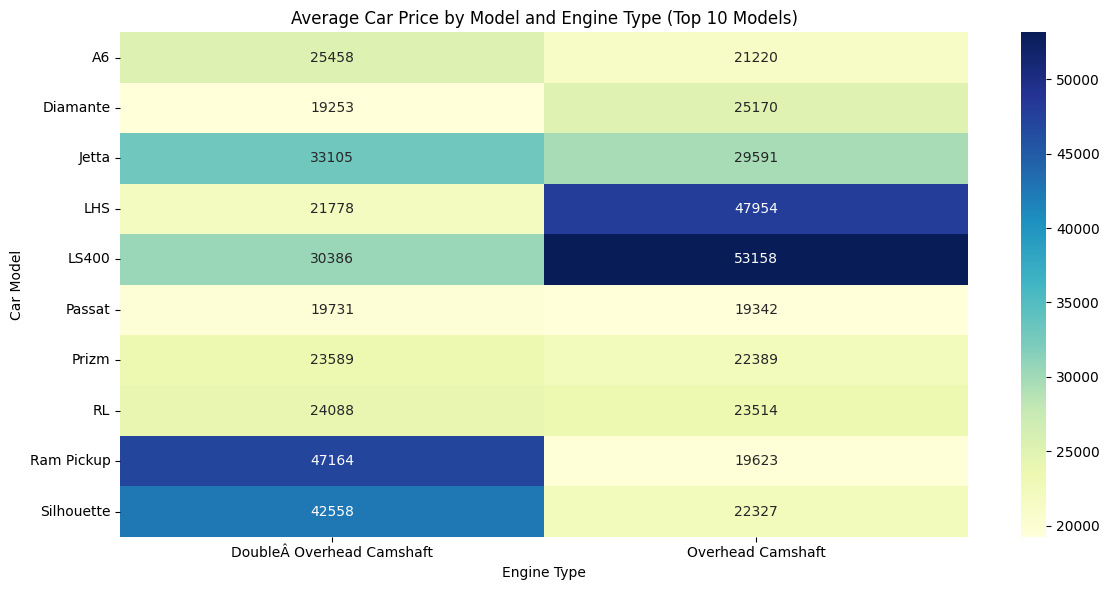

In [58]:
# Answer 15
# Calculate the average car price for each combination of Model and Engine type
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price'].mean().reset_index()

# Display the top 10 combinations with the highest average price
top_combinations = avg_price_by_model_engine.sort_values(by='Price', ascending=False).head(10)
print("Top 10 Model-Engine combinations by average price:\n", top_combinations)

# Visualize: Heatmap of average price by Model and Engine (showing top 10 models for clarity)
top_models = df['Model'].value_counts().head(10).index
pivot_table = avg_price_by_model_engine[avg_price_by_model_engine['Model'].isin(top_models)].pivot(
    index='Model', columns='Engine', values='Price'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Car Price by Model and Engine Type (Top 10 Models)')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


# **EDA 3**

Amazon Sales Data

**Description:**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Features:**

- product_id: Unique identifier for each product

- product_name: Name of the product

- category: Category of the product

- discounted_price: Discounted price of the product

- actual_price: Actual price of the product

- discount_percentage: Percentage of discount for the product

- rating: Rating of the product (1-5)

- rating_count: Number of people who voted for the Amazon rating

- about_product: Description about the product

- user_id: ID of the user who wrote the review

- user_name: Name of the user who wrote the review

- review_id: ID of the user review

- review_title: Short review

- review_content: Long review

- img_link: Image link of the product

- product_link: Official website link of the product

   ## Source: Amazon Sales


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('amazon.csv')
# Display the first few rows of the dataframe
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **Questions:**

**Q1.What is the average rating for each product category?**

In [3]:
# Answer 1
# Convert 'rating' column to numeric (in case it's stored as string)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'category' and calculate average rating
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

print("Average rating for each product category:\n", avg_rating_by_category)

Average rating for each product category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Ac

**Q2. What are the top rating_count products by category?**

In [4]:
# Answer 2
# Convert 'rating_count' to numeric (remove commas and convert)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

# For each category, find the product with the highest rating_count
top_rating_products = df.loc[df.groupby('category')['rating_count'].idxmax()]

# Select relevant columns for display
top_rating_products_display = top_rating_products[['category', 'product_name', 'rating_count', 'rating']].sort_values(by='rating_count', ascending=False)

print("Top rating_count products by category:\n")
print(top_rating_products_display)

Top rating_count products by category:

                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
352   Electronics|Headphones,Earbuds&Accessories|Hea...   
370   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
...                                                 ...   
863   Computers&Accessories|Components|InternalHardD...   
1014   Computers&Accessories|Laptops|TraditionalLaptops   
557   Electronics|Mobiles&Accessories|MobileAccessor...   
269        Electronics|HomeAudio|Speakers|TowerSpeakers   
264   Electronics|HomeAudio|MediaStreamingDevices|St...   

                                           product_name  rating_count  rating  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0     4.4  
352   boAt Bassheads 100 in Ear Wired Earphones with...      363713.0     4.1  
370   Redmi

**Q3. What is the distribution of discounted prices vs. actual prices?**

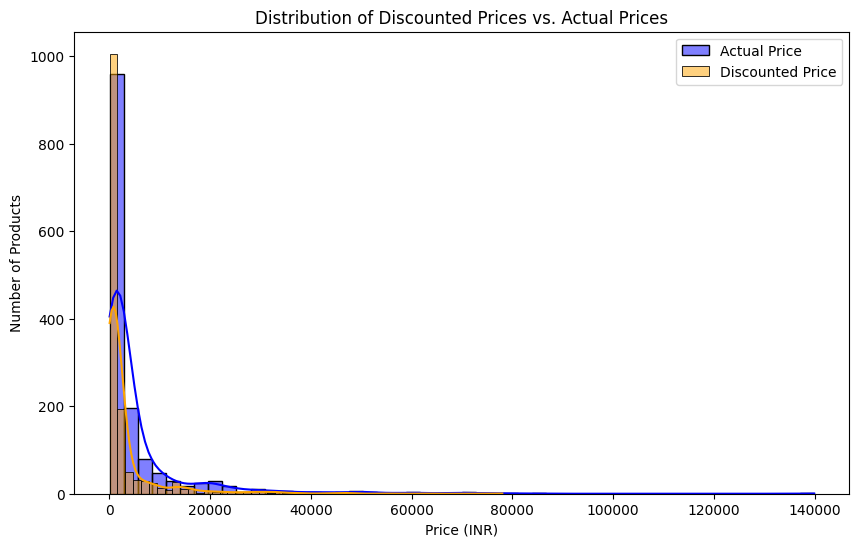

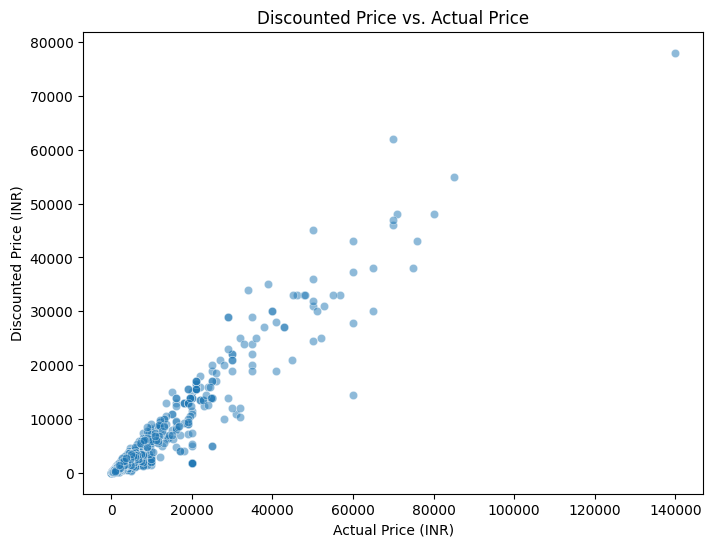

In [9]:
# Answer 3
# Convert 'discounted_price' and 'actual_price' to numeric values (remove ₹ and commas)
df['discounted_price_num'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['actual_price_num'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Drop rows with missing price values
price_df = df.dropna(subset=['discounted_price_num', 'actual_price_num'])

# Plot the distribution of discounted vs. actual prices
plt.figure(figsize=(10, 6))
sns.histplot(price_df['actual_price_num'], color='blue', label='Actual Price', kde=True, bins=50, alpha=0.5)
sns.histplot(price_df['discounted_price_num'], color='orange', label='Discounted Price', kde=True, bins=50, alpha=0.5)
plt.legend()
plt.xlabel('Price (INR)')
plt.ylabel('Number of Products')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.show()

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=price_df['actual_price_num'], y=price_df['discounted_price_num'], alpha=0.5)
plt.xlabel('Actual Price (INR)')
plt.ylabel('Discounted Price (INR)')
plt.title('Discounted Price vs. Actual Price')
plt.show()

**Q4. How does the average discount percentage vary across categories?**

Average discount percentage by category:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper               

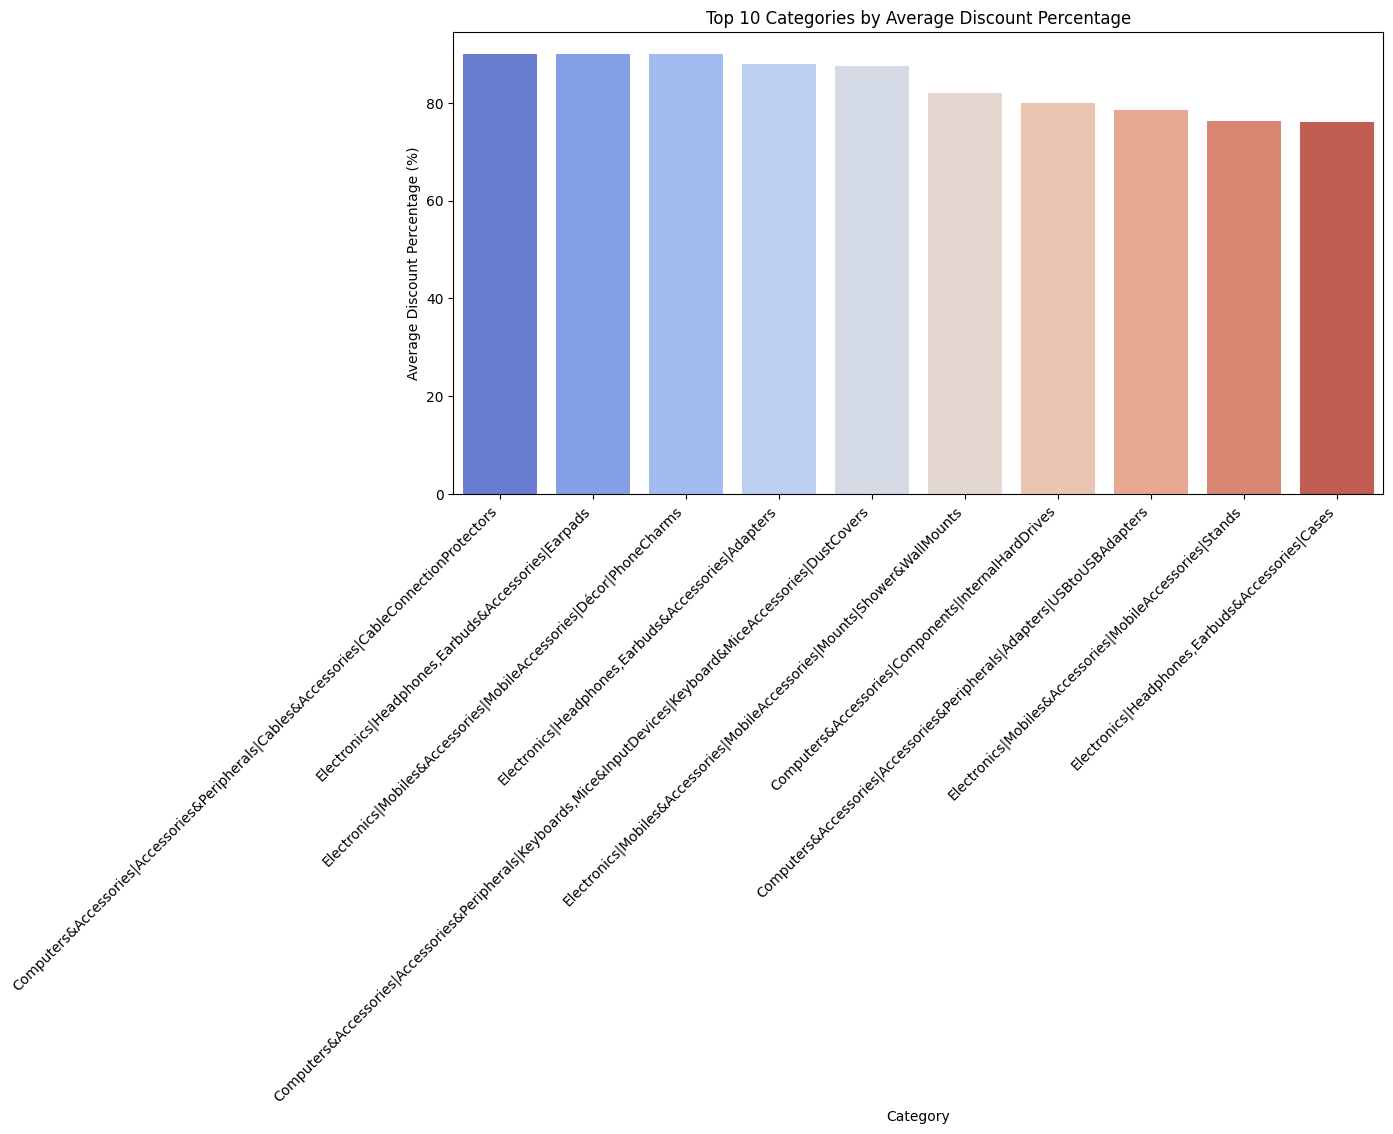

In [10]:
# Answer 4
# Convert 'discount_percentage' to numeric (remove '%' and convert)
df['discount_percentage_num'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')

# Calculate average discount percentage for each category
avg_discount_by_category = df.groupby('category')['discount_percentage_num'].mean().sort_values(ascending=False)

print("Average discount percentage by category:\n", avg_discount_by_category)

# Visualize the top 10 categories with the highest average discount percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_by_category.head(10).index, y=avg_discount_by_category.head(10).values, palette='coolwarm')
plt.title('Top 10 Categories by Average Discount Percentage')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Q5. What are the most popular product names?**

Top 10 most popular product names (by rating count):
                                           product_name  rating_count  rating  \
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0     4.4   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0     4.4   
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0     4.4   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0     4.4   
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0     4.1   
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0     4.1   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0     4.1   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0     4.1   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0     4.1   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0     4.1   

                                              category  
47   Ele

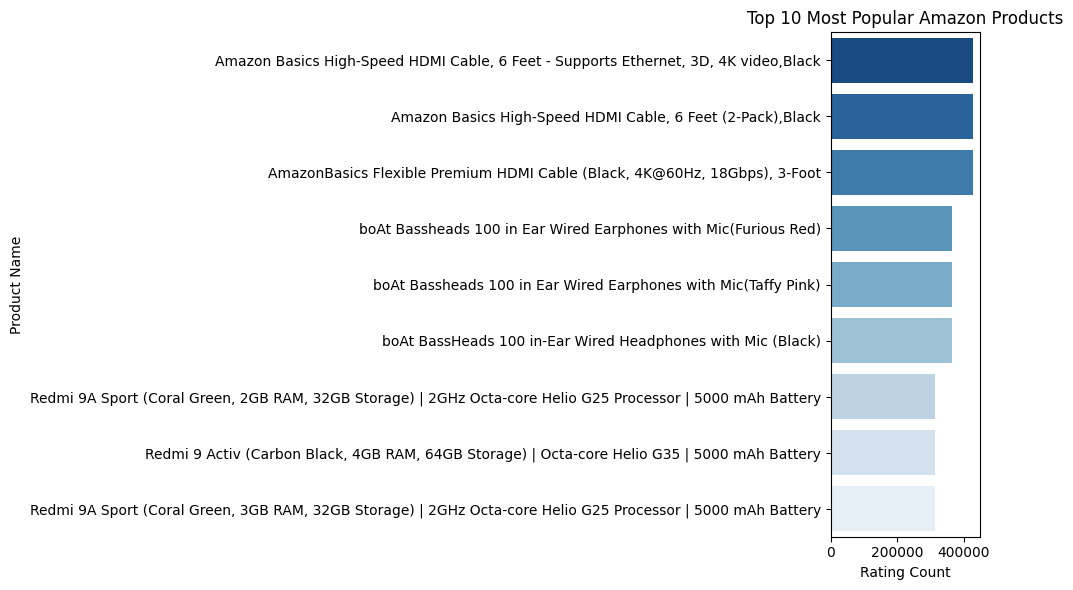

In [11]:
# Answer 5
# Find the most popular product names by rating_count
most_popular_products = df.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count', 'rating', 'category']].dropna(subset=['rating_count']).head(10)
print("Top 10 most popular product names (by rating count):\n", most_popular_products)

# Visualize the top 10 most popular products
plt.figure(figsize=(10, 6))
sns.barplot(
    y=most_popular_products['product_name'],
    x=most_popular_products['rating_count'],
    palette='Blues_r'
)
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.title('Top 10 Most Popular Amazon Products')
plt.tight_layout()
plt.show()

**Q6. What are the most popular product keywords?**

Most popular product keywords:
black: 530
usb: 417
cable: 414
charging: 247
type: 243
fast: 212
smart: 175
white: 170
compatible: 146
data: 136
led: 129
pro: 125
wireless: 119
water: 114
remote: 109


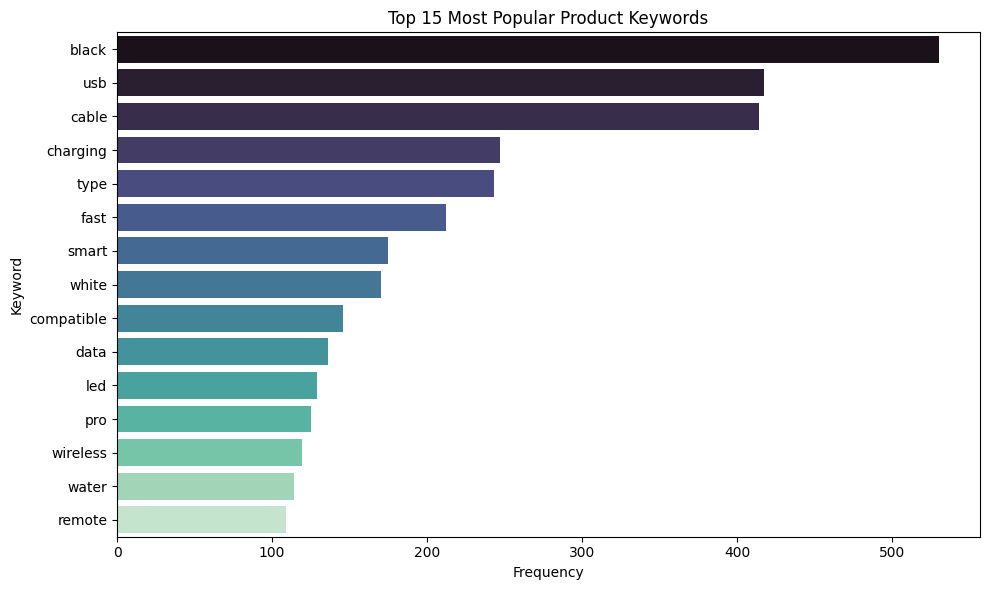

In [12]:
from collections import Counter
import re

# Answer 6

# Combine all product names into a single string and split into words
all_product_names = ' '.join(df['product_name'].dropna()).lower()

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', all_product_names)

# Remove common stopwords for better keyword extraction
stopwords = set([
    'and', 'with', 'for', 'of', 'to', 'in', 'on', 'by', 'the', 'a', 'an', 'at', 'is', 'from', 'or', 'as', 'pack', 'set'
])
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]

# Count word frequencies
word_counts = Counter(filtered_words)
most_common_keywords = word_counts.most_common(15)

# Display the most popular keywords
print("Most popular product keywords:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

# Visualize the top keywords
keywords, counts = zip(*most_common_keywords)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(keywords), palette='mako')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 15 Most Popular Product Keywords')
plt.tight_layout()
plt.show()

**Q7.What are the most popular product reviews?** 

In [ ]:
# Answer 7
# Find the reviews with the highest rating_count (most popular products)
# We'll extract the review_title and review_content for the top 10 most popular products

# Get top 10 products by rating_count
top_products = df.sort_values(by='rating_count', ascending=False).head(10)

# For each product, display product_name, rating_count, review_title, and review_content
for idx, row in top_products.iterrows():
    print(f"Product: {row['product_name']}")
    print(f"Category: {row['category']}")
    print(f"Rating Count: {row['rating_count']}")
    print(f"Review Titles: {row['review_title']}")
    print(f"Review Contents: {row['review_content']}")
    print('-' * 80)

Product: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Category: Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables
Rating Count: 426973.0
Review Titles: It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
Review Contents: I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better

**Q8. What is the correlation between discounted_price and rating?**

Data types after cleaning:
discounted_price    float64
rating              float64
dtype: object

Correlation between Discounted Price and Rating: 0.1203


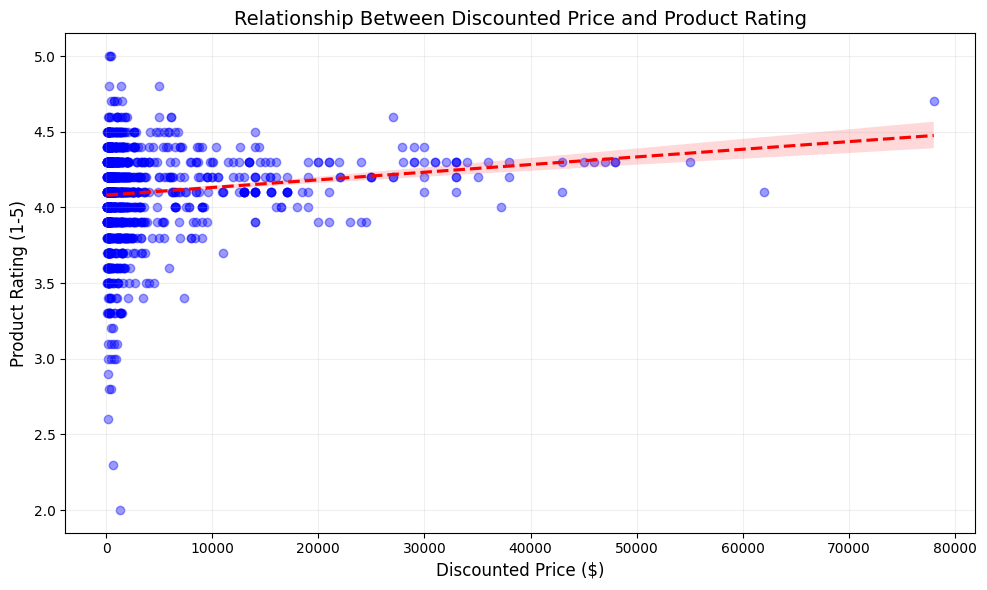


Additional Insights:
--------------------------------------------------
1. Number of products analyzed: 1464
2. Average discounted price: $3126.01
3. Average product rating: 4.10/5
4. Price range: $39.00 - $77990.00
5. Rating distribution: 2.0 to 5.0


In [14]:
# Answer 8
# Data Cleaning Function
def clean_currency(value):
    """Convert currency strings to floats"""
    if isinstance(value, str):
        cleaned = re.sub(r'[^\d.]', '', value)
        return float(cleaned) if cleaned else None
    return value

# Clean and convert columns
df['discounted_price'] = df['discounted_price'].apply(clean_currency)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Handle missing values
df_clean = df.dropna(subset=['discounted_price', 'rating'])

# Verify we have numeric types
print("Data types after cleaning:")
print(df_clean[['discounted_price', 'rating']].dtypes)

# Calculate correlation safely
if len(df_clean) > 1:
    correlation = df_clean['discounted_price'].corr(df_clean['rating'])
    print(f"\nCorrelation between Discounted Price and Rating: {correlation:.4f}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x='discounted_price', 
        y='rating', 
        data=df_clean,
        scatter_kws={'alpha': 0.4, 'color': 'blue'},
        line_kws={'color': 'red', 'linestyle': '--'}
    )
    plt.title('Relationship Between Discounted Price and Product Rating', fontsize=14)
    plt.xlabel('Discounted Price ($)', fontsize=12)
    plt.ylabel('Product Rating (1-5)', fontsize=12)
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print("\nAdditional Insights:")
    print("-" * 50)
    print(f"1. Number of products analyzed: {len(df_clean)}")
    print(f"2. Average discounted price: ${df_clean['discounted_price'].mean():.2f}")
    print(f"3. Average product rating: {df_clean['rating'].mean():.2f}/5")
    print(f"4. Price range: ${df_clean['discounted_price'].min():.2f} - ${df_clean['discounted_price'].max():.2f}")
    print(f"5. Rating distribution: {df_clean['rating'].min():.1f} to {df_clean['rating'].max():.1f}")
else:
    print("Insufficient data to calculate correlation. Check data cleaning steps.")

**Q9. What are the Top 5 categories based on the highest ratings?**

Top 5 categories based on the highest average ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


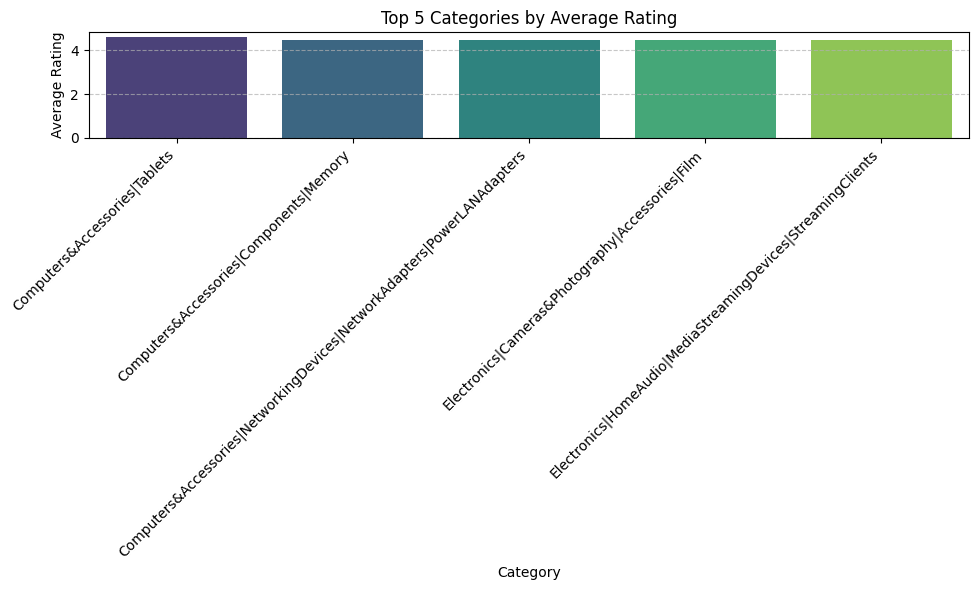

In [ ]:
# Answer 9
top_5_categories_by_rating = df.groupby('category')['rating'].mean().nlargest(5)
print("Top 5 categories based on the highest average ratings:\n", top_5_categories_by_rating)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories_by_rating.index, y=top_5_categories_by_rating.values, palette='viridis')
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Q10. Identify any potential areas for improvement or optimization based on the data analysis.**

In [ ]:
# Answer 10

print("Potential Areas for Improvement or Optimization:")

# 1. Categories with Low Average Ratings
low_rating_categories = avg_rating_by_category[avg_rating_by_category < 3.8]
if not low_rating_categories.empty:
    print("\n1. Categories with consistently low average ratings:")
    print(low_rating_categories.sort_values().head(10))
    print("-> Consider investigating product quality or customer satisfaction issues in these categories.")

# 2. Weak Correlation Between Price and Rating
print(f"\n2. Correlation between discounted price and rating: {correlation:.2f}")
if abs(correlation) < 0.2:
    print("-> There is little to no correlation between price and rating. Consider reviewing pricing strategies or ensuring higher-priced products deliver better value.")

# 3. Data Quality Issues
missing_ratings = df['rating'].isnull().sum()
missing_prices = df['discounted_price'].isnull().sum()
if missing_ratings > 0 or missing_prices > 0:
    print(f"\n3. Data quality: {missing_ratings} missing ratings, {missing_prices} missing discounted prices.")
    print("-> Improve data collection to reduce missing values for more robust analysis.")

# 4. Outlier Detection
outlier_threshold = df['discounted_price'].quantile(0.99)
outliers = df[df['discounted_price'] > outlier_threshold]
if not outliers.empty:
    print(f"\n4. Outliers detected in discounted prices above {outlier_threshold:.2f}.")
    print("-> Review these products for potential data entry errors or unusual pricing.")

# 5. Category Optimization
print("\n5. Top categories by average rating:")
print(top_5_categories_by_rating)
print("-> Focus marketing and inventory on these high-performing categories.")

# 6. Product Popularity
popular_products = df.sort_values(by='rating_count', ascending=False).head(5)
print("\n6. Most popular products by rating count:")
print(popular_products[['product_name', 'category', 'rating_count', 'rating']])

print("\nSummary:")
print("- Address low-rated categories and investigate causes.")
print("- Ensure pricing aligns with perceived value.")
print("- Improve data completeness and accuracy.")
print("- Monitor and address outliers in pricing.")
print("- Leverage top-rated categories and popular products for growth.")

Potential Areas for Improvement or Optimization:

1. Categories with consistently low average ratings:
category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.300000
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.400000
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.600000
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                          3.600000
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|HalogenHeaters                                               3.600000
Home&Kitchen|Kitchen&HomeAppliance


# **EDA 4**

**Dataset:**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

**Application in Data Science:**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors:**

Artist: The name of the artist, providing direct attribution to the creative mind behind the track. Track Name: The title of the track, encapsulating its identity and essence. Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners. Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience. Track ID: A unique identifier within Spotify's ecosystem enabling direct access to the track for further


In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv('spotify.csv')
# Display the first few rows of the dataframe
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


# **Questions:**

**Q1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.**

In [ ]:
# Answer 1
# Check for null values
print("Null values in each column:\n", df.isnull().sum())

# Drop rows with any null values
df = df.dropna()
print(f"\nData shape after dropping nulls: {df.shape}")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Data shape after dropping duplicates: {df.shape}")
else:
    print("No duplicate rows found.")

Null values in each column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Data shape after dropping nulls: (440, 5)

Number of duplicate rows: 27
Data shape after dropping duplicates: (413, 5)


**Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

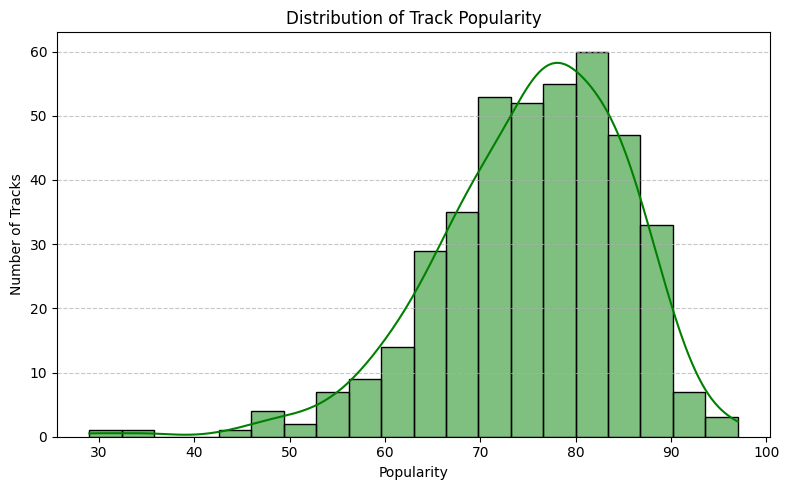

In [ ]:
# Answer 2
# Distribution of popularity among tracks
plt.figure(figsize=(8, 5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='Green', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

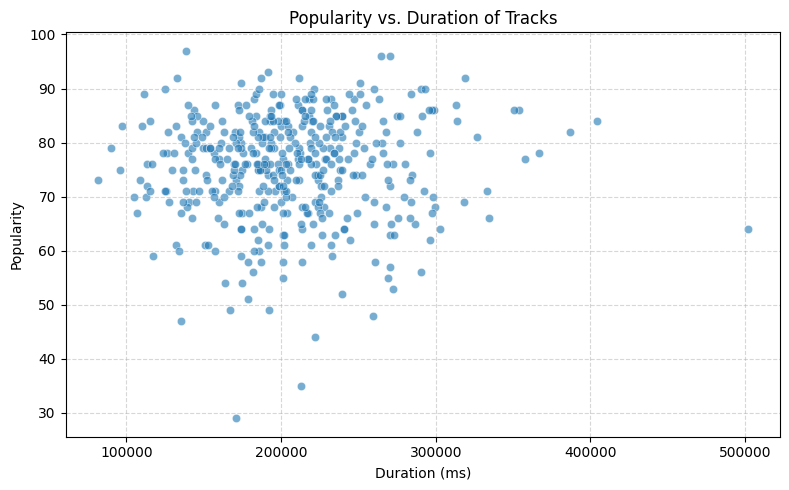

Correlation between track duration and popularity: 0.04


In [ ]:
# Answer 3
# Scatter plot to explore the relationship between popularity and duration of tracks
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.6)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs. Duration of Tracks')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate and print the correlation coefficient
correlation = df['Duration (ms)'].corr(df['Popularity'])
print(f"Correlation between track duration and popularity: {correlation:.2f}")

**Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.**

Number of tracks per artist:
 Artist
Drake           17
Eminem          11
Lil Nas X       10
JAY-Z           10
21 Savage       10
Flo Rida        10
¥$              10
Timbaland       10
Ludacris        10
Travis Scott     9
Name: count, dtype: int64

The artist with the highest number of tracks is: Drake with 17 tracks.


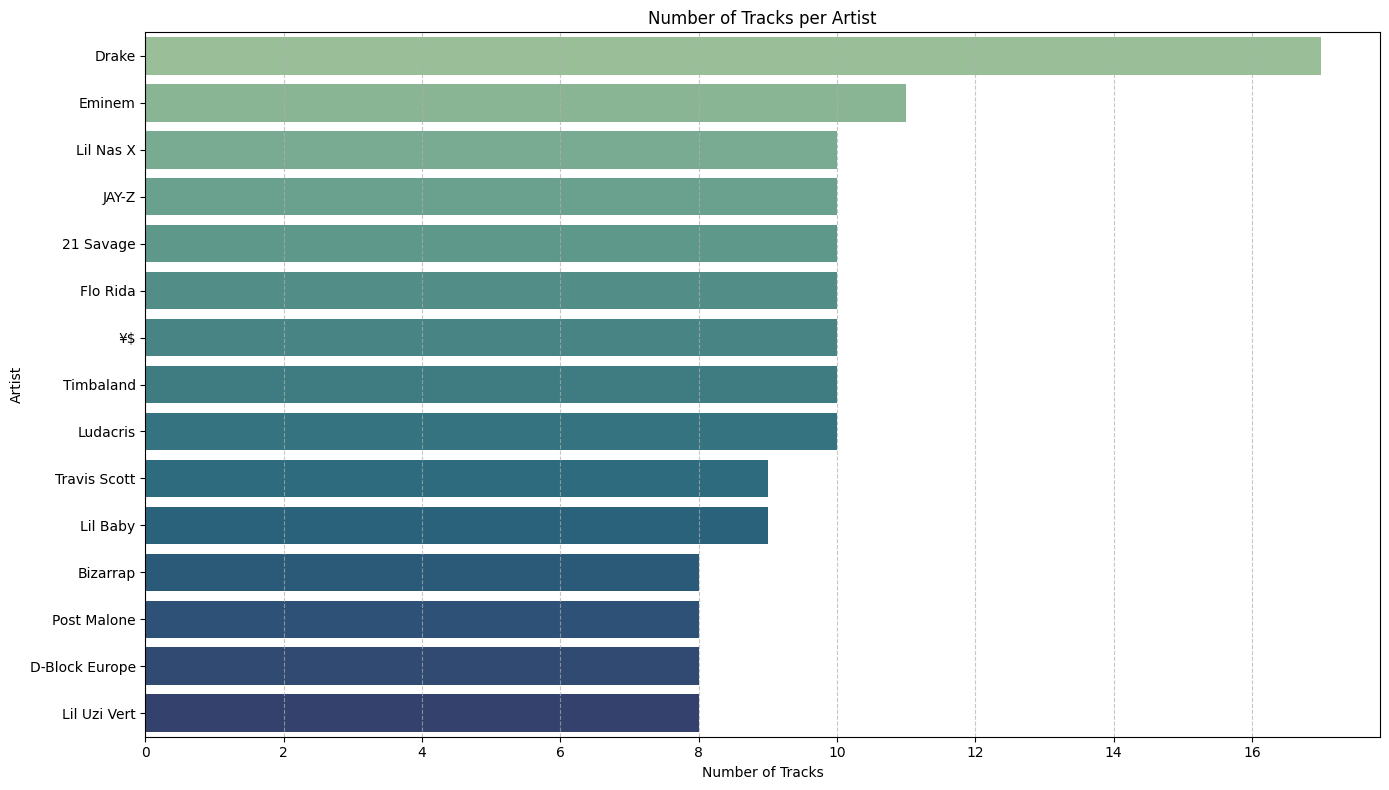

In [27]:
artist_track_counts = df['Artist'].value_counts()
print("Number of tracks per artist:\n", artist_track_counts.head(10)) # Display top 10

highest_track_artist = artist_track_counts.index[0]
print(f"\nThe artist with the highest number of tracks is: {highest_track_artist} with {artist_track_counts.iloc[0]} tracks.")

plt.figure(figsize=(14, 8))
sns.countplot(y='Artist', data=df, order=artist_track_counts.index[:15], palette='crest') # Top 15 artists for better visualization
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [29]:
# Answer 5
#top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

print("Top 5 least popular tracks in the dataset:")
for idx, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track Name: {row['Track Name']}, Popularity: {row['Popularity']}")

Top 5 least popular tracks in the dataset:
Artist: Pressa, Track Name: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track Name: Intentions, Popularity: 35
Artist: French Montana, Track Name: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track Name: On Me - Remix, Popularity: 47
Artist: Wyclef Jean, Track Name: 911 (feat. Mary J. Blige), Popularity: 48


**Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

Average popularity for each of the top 5 most popular artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Among the top 5 most popular artists, '21 Savage' has the highest average popularity: 83.80


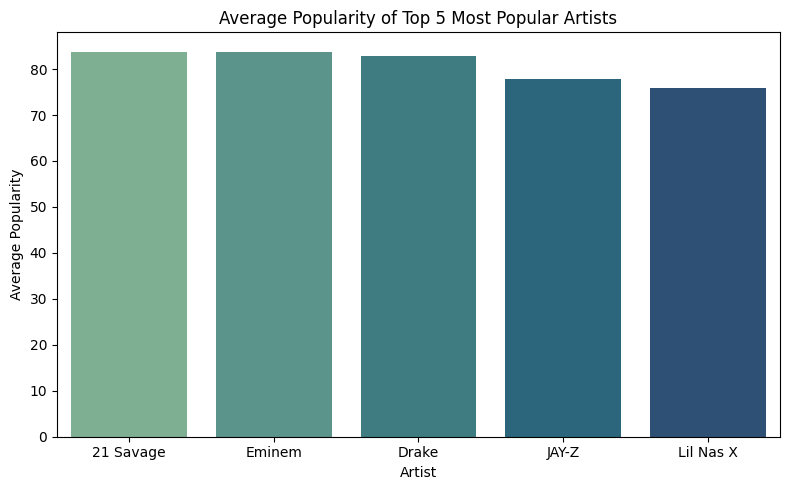

In [30]:
# Answer 6

# Get the top 5 most popular artists by track count
top_5_artists = artist_track_counts.head(5).index.tolist()

# Calculate average popularity for each of these artists
avg_popularity_top5 = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("Average popularity for each of the top 5 most popular artists:\n", avg_popularity_top5)

# Identify the artist with the highest average popularity
highest_avg_pop_artist = avg_popularity_top5.idxmax()
highest_avg_pop_value = avg_popularity_top5.max()
print(f"\nAmong the top 5 most popular artists, '{highest_avg_pop_artist}' has the highest average popularity: {highest_avg_pop_value:.2f}")

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_popularity_top5.index, y=avg_popularity_top5.values, palette='crest')
plt.title('Average Popularity of Top 5 Most Popular Artists')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

**Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [31]:
# Answer 7

# For each of the top 5 most popular artists, find their most popular track(s)
top_tracks = []
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    max_popularity = artist_tracks['Popularity'].max()
    most_popular_tracks = artist_tracks[artist_tracks['Popularity'] == max_popularity][['Artist', 'Track Name', 'Popularity']]
    top_tracks.append(most_popular_tracks)

# Concatenate results
top_tracks_df = pd.concat(top_tracks, ignore_index=True)

print("Most popular track(s) for each of the top 5 most popular artists:")
for artist in top_5_artists:
    tracks = top_tracks_df[top_tracks_df['Artist'] == artist]
    track_names = tracks['Track Name'].tolist()
    popularity = tracks['Popularity'].iloc[0]
    print(f"\nArtist: {artist}")
    print(f"Most Popular Track(s) (Popularity {popularity}):")
    for name in track_names:
        print(f" - {name}")

Most popular track(s) for each of the top 5 most popular artists:

Artist: Drake
Most Popular Track(s) (Popularity 92):
 - Rich Baby Daddy (feat. Sexyy Red & SZA)

Artist: Eminem
Most Popular Track(s) (Popularity 90):
 - Without Me

Artist: Lil Nas X
Most Popular Track(s) (Popularity 81):
 - THATS WHAT I WANT

Artist: JAY-Z
Most Popular Track(s) (Popularity 86):
 - Ni**as In Paris

Artist: 21 Savage
Most Popular Track(s) (Popularity 96):
 - redrum


**Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

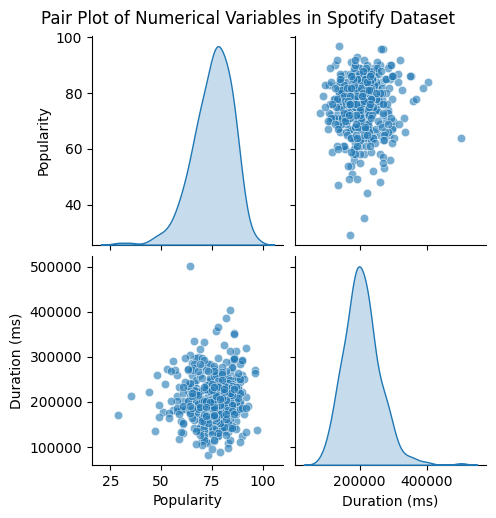

In [32]:
# Answer 8
# Select relevant numerical columns for the pair plot
num_cols = ['Popularity', 'Duration (ms)']

# Create a pair plot to visualize relationships
sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Variables in Spotify Dataset', y=1.02)
plt.show()

**Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

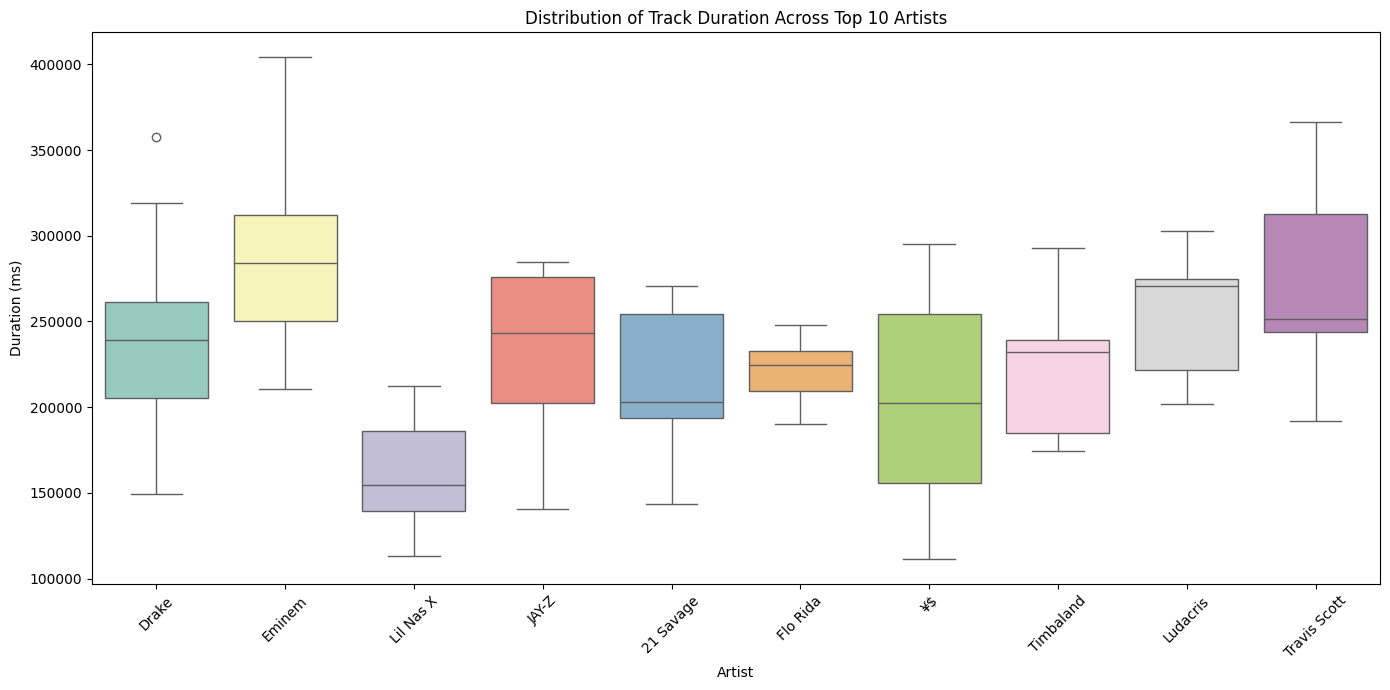

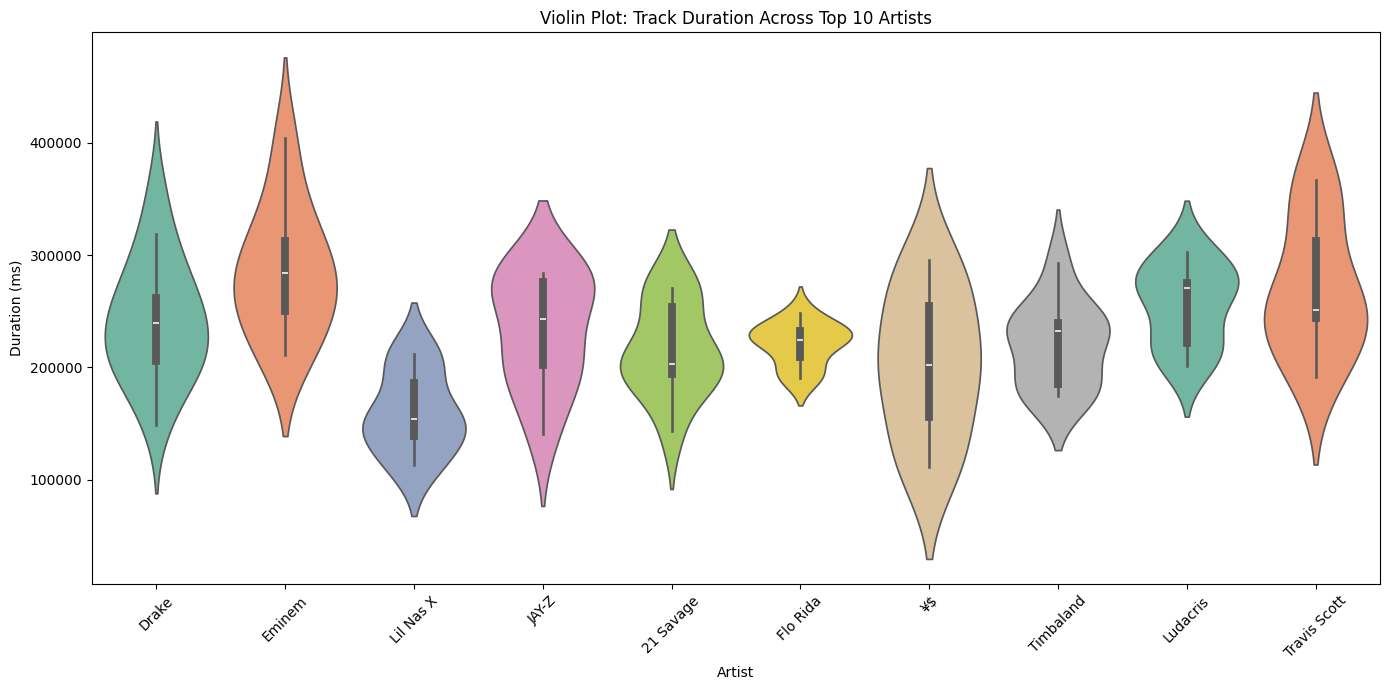

In [33]:
# Answer 7
# Visualize the variation in track duration across different artists using a box plot

# For clarity, show only the top 10 artists by track count
top_artists = artist_track_counts.head(10).index
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='Artist',
    y='Duration (ms)',
    data=df[df['Artist'].isin(top_artists)],
    order=top_artists,
    palette='Set3'
)
plt.title('Distribution of Track Duration Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternatively, use a violin plot for a more detailed distribution
plt.figure(figsize=(14, 7))
sns.violinplot(
    x='Artist',
    y='Duration (ms)',
    data=df[df['Artist'].isin(top_artists)],
    order=top_artists,
    palette='Set2'
)
plt.title('Violin Plot: Track Duration Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a vilon plot?**

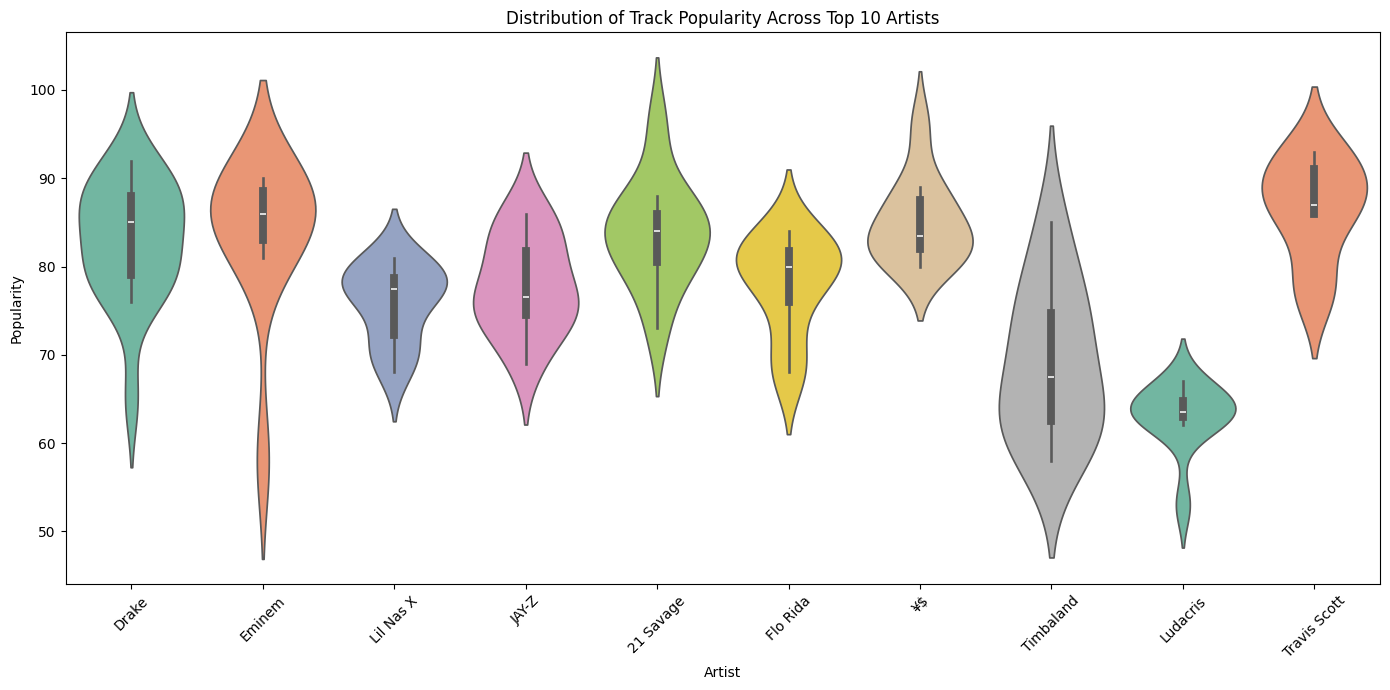

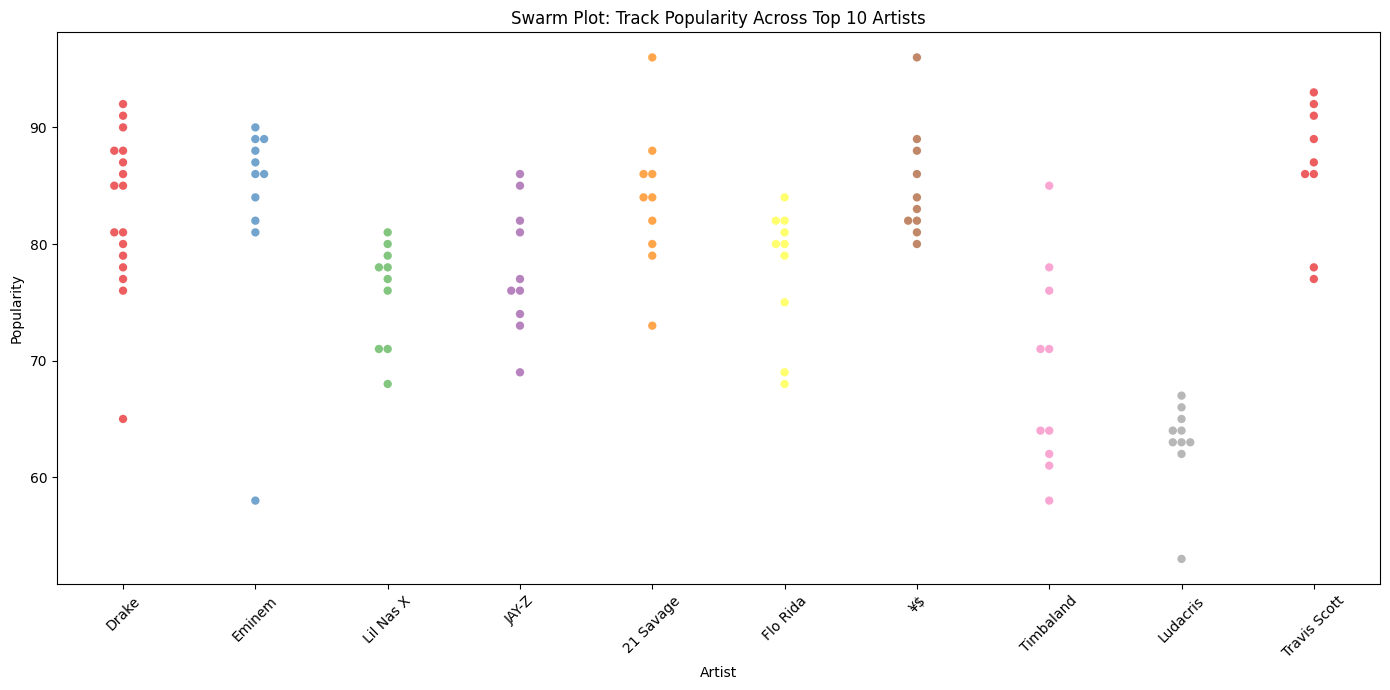

In [34]:
# Answer 10

# For clarity, visualize only the top 10 artists by track count
top_artists = artist_track_counts.head(10).index

plt.figure(figsize=(14, 7))
sns.violinplot(
    x='Artist',
    y='Popularity',
    data=df[df['Artist'].isin(top_artists)],
    order=top_artists,
    palette='Set2'
)
plt.title('Distribution of Track Popularity Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternatively, use a swarm plot for a more granular view
plt.figure(figsize=(14, 7))
sns.swarmplot(
    x='Artist',
    y='Popularity',
    data=df[df['Artist'].isin(top_artists)],
    order=top_artists,
    palette='Set1',
    size=6,
    alpha=0.7
)
plt.title('Swarm Plot: Track Popularity Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()